<img src="https://www.python.org/static/img/python-logo.png" width="300" alt="Python logo"  />
<font color='blue'>
$\Large\text{Pontificia Universidad Católica del Perú}$</font>

$$\Large \textit{Estadística Aplicada}$$

$$\large\textbf{Trabajo Final}$$

# Trabajo Grupal Final

El trabajo final del curso consiste en realizar un análisis exploratorio de datos y ajustar algunos
modelos predictivos utilizando una base de datos de su elección. El objetivo de este trabajo es
demostrar competencia en el uso de las herramientas vistas en clases e interpretación de
resultados.

# 1. Exploración de datos



* **(1 punto)** Explicar el problema a resolver, la cantidad de observaciones, y de ser posible identificar si el muestreo fue aleatorio o no.
* **(2 puntos)** Exploración por cada variable:

  * i. Para las cualitativas, mostrar un gráfico por variable y conclusiones.

  * ii. Para las cuantitativas, mostrar gráficos estadísticos (medidas resumen) y conclusiones. La conclusión debe hablar acerca de la tendencia central y dispersión de cada variable.

* **(2 puntos)** Exploración de dos variables:

  * i. Explorar la relación entre pares de variables y elegir solo dos pares de variables a reportar: los que considere más relevantes justifique sus resultados con pruebas estadísticas, ejemplo chi-cuadrado.
  * ii. Crear un gráfico para mostrar la asociación entre cada par de variables y medir el grado de asociación. Dar una conclusión acerca de la asociación entre cada par de variables

## Base de datos

Fue escogido como base de datos la **Encuesta Nacional de Examen de Salud y Nutrición** (NHANES, por sus siglas en inglés *National Health and Nutrition Examination Survey*) del 2015-2016.


Es una encuesta nacional de Estados Unidos que observa el estado de salud y nutrición de los niños y adultos. La encuesta es única debido a que combina entrevistas con exámenes físicos. NHANES es dirigida por el Centro Nacional de Estadísticas de la Salud (NCHS, por sus siglas en inglés). NCHS es parte de los Centros para el Control y la Prevención de Enfermedades (CDC, por sus siglas en inglés) y es responsable de producir las estadísticas vitales y de salud para el país.


Los datos originales de este estudio están disponibles en el siguiente enlace:

https://wwwn.cdc.gov/nchs/nhanes/Default.aspx

**Procedimiento de muestreo de NHANES**

Divide a Estados Unidos en diferentes regiones basado en la geografía y densidad poblacional (estratos).
* **Etapa 1:** Se seleccionan aleatoriamente condados únicos, o en algunos casos, un grupo de condados vecinos (*counties*) para cada estrato (conglomerados). La probabilidad de selección es proporcional a la "medida del tamaño", es decir, es más probable que se seleccionen muestras de poblaciones más grandes que aquellas con poblaciones más pequeñas.

* **Etapa 2:** Los condados muestreados están divididos en segmentos (generalmente en bloques o manzanas, o su equivalente). Con la misma métodología usada para los condados, se seleccionan muestras de segmentos.

* **Etapa 3:** Se enumeran las viviendas u hogares dentro de cada segmento y se extrae una muestra de manera aleatoria. En áreas geográficas donde la población tiene una mayor proporción de un grupo de edad, etnia o ingreso particular, la probabilidad de selección para esos grupos es mayor que en otras áreas (sobremuestreo).

* **Etapa 4:** Se eligen personas aleatoriamente para participar en NHANES de una lista de todas las personas que residen en hogares seleccionados. En promedio, se seleccionan alrededor de 2 personas de la muestra por hogar elegible.

<img src="https://wwwn.cdc.gov/nchs/nhanes/Images/Tutorials/Continuous/SampleDesign-Stages.gif" width="400" alt="Four Stages of NHANES Sampling Procedure"  />


<img src="https://blogs.cdc.gov/nchs/wp-content/uploads/sites/36/2015/06/nhanes_mec_collects_health_data1.jpg" width="400" alt="Four Stages of NHANES Sampling Procedure"  />

Mayor información con respecto al diseño de la muestra de NHANES se encuentra en el siguiente enlace:

https://wwwn.cdc.gov/nchs/nhanes/tutorials/SampleDesign.aspx

In [1]:
# Cargamos librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
# Lectura de los datos
url = 'nhanes_2015_2016.csv'
data = pd.read_csv(url)
data.head()

SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0     NaN     1.0       1         1        62         3   
1  83733     1.0     NaN     6.0       1         1        53         3   
2  83734     1.0     NaN     NaN       1         1        78         3   
3  83735     2.0     1.0     1.0       2         2        56         3   
4  83736     2.0     1.0     1.0       2         2        42         4   

   DMDCITZN  DMDEDUC2  DMDMARTL  DMDHHSIZ  INDFMPIR  BPXSY1  BPXDI1  BPXSY2  \
0       1.0       5.0       1.0         2      4.39   128.0    70.0   124.0   
1       2.0       3.0       3.0         1      1.32   146.0    88.0   140.0   
2       1.0       3.0       1.0         2      1.51   138.0    46.0   132.0   
3       1.0       5.0       6.0         1      5.00   132.0    72.0   134.0   
4       1.0       4.0       3.0         5      1.23   100.0    70.0   114.0   

   BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  HIQ210  
0    64.0   94.8  184.5    27.8    43.3     43.6     35.9     101.1     2.0  
1    88.0   90.4  171.4    30.8    38.0     40.0     33.2     107.9     NaN  
2    44.0   83.4  170.1    28.8    35.6     37.0     31.0     116.5     2.0  
3    68.0  109.8  160.9    42.4    38.5     37.7     38.3     110.1     2.0  
4    54.0   55.2  164.9    20.3    37.4     36.0     27.2      80.4     2.0

Se observa presencia de valores nulos.

In [3]:
# Tamaño de los datos
print('Número de variables: {}'.format(data.shape[1]))
print('Número de observaciones: {}'.format(data.shape[0]))

Número de variables: 25
Número de observaciones: 5735


In [4]:
# Nombres de las variables
print('Nombre de las variables:\n {}'.format(data.columns))

Nombre de las variables:
 Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'INDFMPIR',
       'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI',
       'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210'],
      dtype='object')


Estos nombres corresponden a las variables del estudio de NHNES. Por ejemplo, `SEQN` es un único identificador para cada persona, y `BMXWT` es el peso de la persona en kilogramos ("BMX" es un prefijo de NHNES para mediciones del cuerpo).

Las variables en la base de datos de NHNES están documentadas en una serie de libros de código o "codebooks" que están disponibles en línea.

Para el presente estudio de NHNES 2015-2016 los codebooks pueden encontrarse en el siguiente enlace:

https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015

Por conveniencia, enlaces directos hacia algunos codebooks comunes se encuentran en son los siguientes enlaces:

* [Demographics code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)

* [Body measures code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm)

* [Blood pressure code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm)

* [Alcohol questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm)

* [Smoking questionaire code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQ_I.htm)

* [Health insurance code book](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm)

## Diccionario de datos

Variables demográficas
* RIAGENDR: Genero.
* RIDAGEYR: Edad en años.
* RIDRETH1: Raza/Origen hispánico.
* DMDCITZN: Estado de la ciudadanía.
* DMDEDUC2: Nivel de eduación.
* DMDMARTL: Estado marital.
* DMDHHSIZ: Número de personas en el hogar.
* INDFMPIR: Relación de ingreso de la familia a pobreza.


Variables de medidas del cuerpo
* BMXWT: Peso (kg).
* BMXHT: Altura (cm).
* BMXBMI: Índice de masa corporal (kg/m**2).
* BMXLEG: Longitud de la pierna (cm).
* BMXARML: Longitud del brazo (cm).
* BMXARMC: Circunferencia del brazo (cm).
* BMXWAIST: Circunferencia de la muñeca (cm).

Variables de medidas de la presión de la sangre
* BPXSY1: Presión arterial sistólica (1ra lectura) (mmHg).
* BPXDI1: Presión arterial diastólica (1ra lectura) (mmHg).
* BPXSY2: Presión arterial sistólica (2da lectura) (mmHg).
* BPXDI2: Presión arterial diastólica (2da lectura) (mmHg).

Variables del cuestionario de alcohol
* ALQ101: Ha tomado al menos 12 tragos de alcohol al año.
* ALQ110: Ha tomado al menos 12 tragos de alcohol en la vida.
* ALQ130: En el último año, cuantos tragos de alcohol ha tomado en promedio en un día.

Variables del cuestionario de fumar
* SMQ020: Ha fumado al menos 100 cigarros en la vida.

Variables de seguro de salud
* HIQ210: En el último año, hubo algún momento en el cual no tuvo seguro de salud cubierto.

## Problema a resolver


**Predecir los factores que determinan que una persona sufra de hipertensión.**

La hipertensión es un trastorno médico grave que puede incrementar el riesgo de enfermedades cardiovasculares, cerebrales, renales y otras. Esta importante causa de defunción prematura en todo el mundo afecta a más de uno de cada cuatro hombres y una de cada cinco mujeres, o sea, más de 1000 millones de personas.

Según la Organización Mundial de la Salud, la hipertensión sucede cuando la presión arterial sistólica es mayor o igual a 140 mmHg y/o la presión arterial diastólica es mayor o igual a 90 mmHg.

https://www.who.int/news-room/fact-sheets/detail/hypertension

La medición de la presión arterial puede ser influenciada por el nerviosismo del paciente al ser atendido por el personal médico. Por esta razón se toma varias lecturas.
Veamos este efecto en nuestros datos.

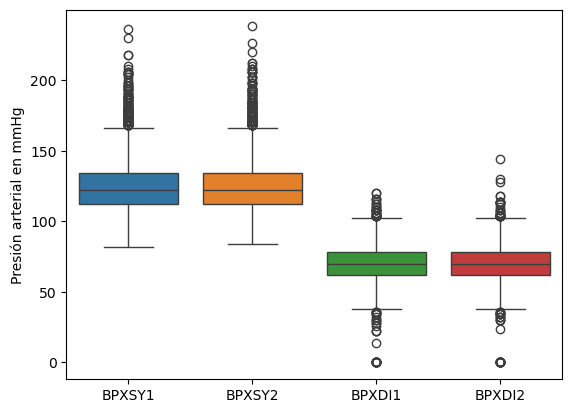

In [5]:
# Gráfica de las presiones arteriales
sns.boxplot(data=data.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
plt.ylabel('Presión arterial en mmHg')
plt.show()

Gráficamente no se observa una gran diferencia entre la primera y segunda lectura de presión.

In [6]:
# Media de la diferencia de presión arterial entre la primera y segunda lectura
print('Media de la diferencia en presión arterial sistólica: {:.3f}'.format(np.mean(data['BPXSY1'] - data['BPXSY2'])))
print('Media de la diferencia en presión arterial diastólica: {:.3f}'.format(np.mean(data['BPXDI1'] - data['BPXDI2'])))

Media de la diferencia en presión arterial sistólica: 0.675
Media de la diferencia en presión arterial diastólica: 0.349


La media de la diferencia de presión arterial tanto sistólica como diastólica es menor a 1 mmHg y no es muy considerable.

In [7]:
# Eliminamos las segundas lecturas de presión sistólica y diastólica
data.drop(columns=['BPXSY2', 'BPXDI2'], inplace=True)

Ahora vamos a crear nuestra variable target a predecir.

In [8]:
# Creando la variable dicotómica a predecir (TARGET)
condicion1 = data['BPXSY1'] >= 140
condicion2 = data['BPXDI1'] >= 90
data['Hipertension'] = np.where(condicion1 | condicion2, 'Si', 'No')

In [9]:
data['Hipertension'].value_counts(normalize=True, dropna=True)

Hipertension
No    0.807672
Si    0.192328
Name: proportion, dtype: float64

Se observa que nuestra variable target se encuentra desbalanceada. Solo un 20% de las personas tiene hipertensión.

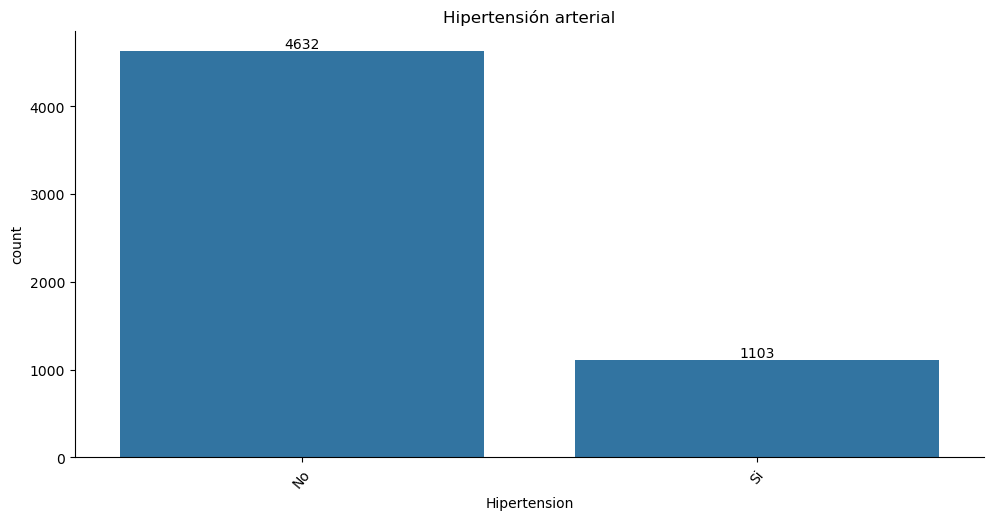

In [10]:
# Gráfica
g = sns.catplot(x='Hipertension', data = data, kind='count', aspect=2, legend = True)
g.set_xticklabels(rotation=50)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Hipertensión arterial')
plt.show()

In [11]:
# Eliminamos la variable 'SEQN' que es el identificador de la persona en el estudio
data.drop(columns='SEQN', inplace=True)

In [12]:
# Tamaño de los datos
print('Número de variables: {}'.format(data.shape[1]))
print('Número de observaciones: {}'.format(data.shape[0]))

Número de variables: 23
Número de observaciones: 5735


In [13]:
# Información general de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ALQ101        5208 non-null   float64
 1   ALQ110        1731 non-null   float64
 2   ALQ130        3379 non-null   float64
 3   SMQ020        5735 non-null   int64  
 4   RIAGENDR      5735 non-null   int64  
 5   RIDAGEYR      5735 non-null   int64  
 6   RIDRETH1      5735 non-null   int64  
 7   DMDCITZN      5734 non-null   float64
 8   DMDEDUC2      5474 non-null   float64
 9   DMDMARTL      5474 non-null   float64
 10  DMDHHSIZ      5735 non-null   int64  
 11  INDFMPIR      5134 non-null   float64
 12  BPXSY1        5401 non-null   float64
 13  BPXDI1        5401 non-null   float64
 14  BMXWT         5666 non-null   float64
 15  BMXHT         5673 non-null   float64
 16  BMXBMI        5662 non-null   float64
 17  BMXLEG        5345 non-null   float64
 18  BMXARML       5427 non-null 

La mayoria de variables son de tipo flotante o entero. Esto debido a que el estudio de NHNES no usa valores de texto en sus datos. Por ejemplo, para la variable de genero `RIAGENDR` no utiliza "F" o "M" sino códigos enteros, `1` para másculino y `2` para femenino. Todo esto se encuentra detallado dentro de los codebooks.

Para variables como `BMXWT` que representan una medida cuantitativa, usualmente son del tipo flotante.

También se observan valores nulos.

In [14]:
# Valores nulos
data.isnull().sum()

ALQ101           527
ALQ110          4004
ALQ130          2356
SMQ020             0
RIAGENDR           0
RIDAGEYR           0
RIDRETH1           0
DMDCITZN           1
DMDEDUC2         261
DMDMARTL         261
DMDHHSIZ           0
INDFMPIR         601
BPXSY1           334
BPXDI1           334
BMXWT             69
BMXHT             62
BMXBMI            73
BMXLEG           390
BMXARML          308
BMXARMC          308
BMXWAIST         367
HIQ210          1003
Hipertension       0
dtype: int64

Se observan una gran cantidad de nulos para las variables `ALQ110`, `ALQ130` y `HIQ210`, así que eliminamos estas variables.

In [15]:
# Eliminamos las variables con gran cantidad de nulos
data.drop(columns=['ALQ110', 'ALQ130', 'HIQ210'], inplace=True)

In [16]:
# Tamaño de los datos
print('Número de variables: {}'.format(data.shape[1]))
print('Número de observaciones: {}'.format(data.shape[0]))

Número de variables: 20
Número de observaciones: 5735


In [17]:
# Valores unicos
data.nunique()

ALQ101            3
SMQ020            4
RIAGENDR          2
RIDAGEYR         63
RIDRETH1          5
DMDCITZN          4
DMDEDUC2          6
DMDMARTL          7
DMDHHSIZ          7
INDFMPIR        440
BPXSY1           68
BPXDI1           50
BMXWT           997
BMXHT           509
BMXBMI          393
BMXLEG          218
BMXARML         163
BMXARMC         297
BMXWAIST        794
Hipertension      2
dtype: int64

In [18]:
data2 = data.copy() # Se procede a copiar este dataframe en uno nuevo para utilizarlo en los modelos de clasificación
data3 = data.copy() # Se procede a copiar este dataframe en uno nuevo para utilizarlo en los modelos de regresión

## Exploración por cada variable

### Variables cualitativas

In [19]:
# Renombramos las variables
renombrar = {
             'ALQ101': 'Alcohol',
             'SMQ020': 'Fumador',
             'RIAGENDR': 'Genero',
             'RIDRETH1': 'Raza',
             'DMDCITZN': 'Ciudadania',
             'DMDEDUC2': 'Educacion',
             'DMDMARTL': 'Estado'}
data.rename(columns=renombrar, inplace=True)

Variable `Alcohol`: Ha tomado al menos 12 tragos de alcohol al año.

In [20]:
# Reemplazamos los códigos por texto
data['Alcohol'] = data['Alcohol'].replace({1: "Si", 2: "No", 9: "No sabe"})

In [21]:
# Valores únicos
data['Alcohol'].value_counts(normalize=False, dropna=True)

Alcohol
Si         3477
No         1728
No sabe       3
Name: count, dtype: int64

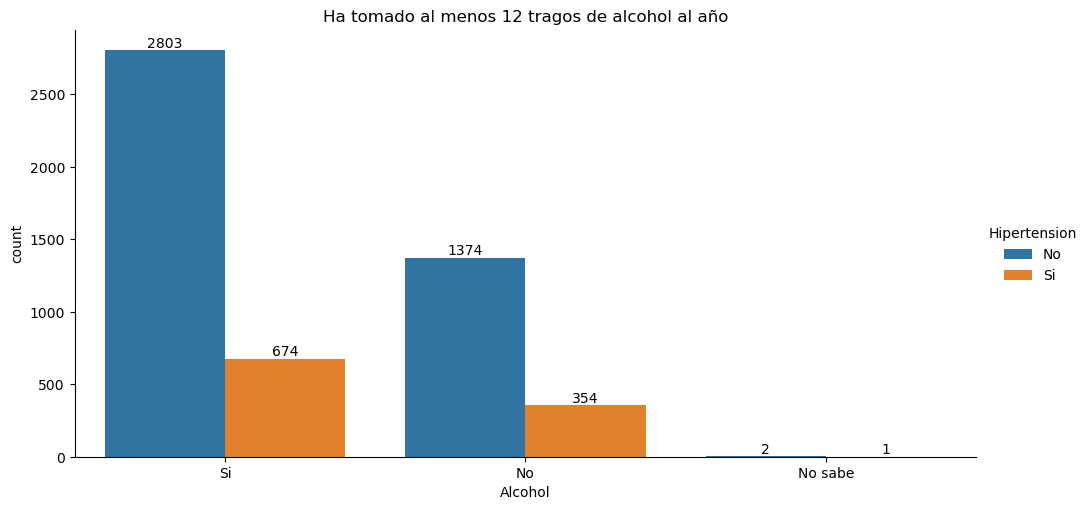

In [22]:
# Gráfica
g = sns.catplot(x='Alcohol', data = data, kind='count', aspect=2, hue='Hipertension', legend = True)
g.set_xticklabels()
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Ha tomado al menos 12 tragos de alcohol al año')
plt.show()

In [23]:
# Análisis
dx = data.loc[~data.Alcohol.isin(['No sabe']), :]  # Eliminamos el valor 'No sabe' del análisis
dx = dx.groupby(['Hipertension'])['Alcohol']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum()*100, axis=1)
print(dx.to_string(float_format="%.1f"))

Alcohol        No   Si
Hipertension          
No           32.9 67.1
Si           34.4 65.6


*Conclusión*: De las personas que sufren hipertensión, el 65.6% Sí ha tomado al menos 12 tragos de alcohol al año.

Variable `Fumador`: Ha fumado al menos 100 cigarros en la vida.

In [24]:
# Reemplazamos los códigos por texto
data['Fumador'] = data['Fumador'].replace({1: "Si", 2: "No", 7: "Niega", 9: "No sabe"})

In [25]:
# Valores únicos
data['Fumador'].value_counts(normalize=True, dropna=True)

Fumador
No         0.593897
Si         0.404359
No sabe    0.001395
Niega      0.000349
Name: proportion, dtype: float64

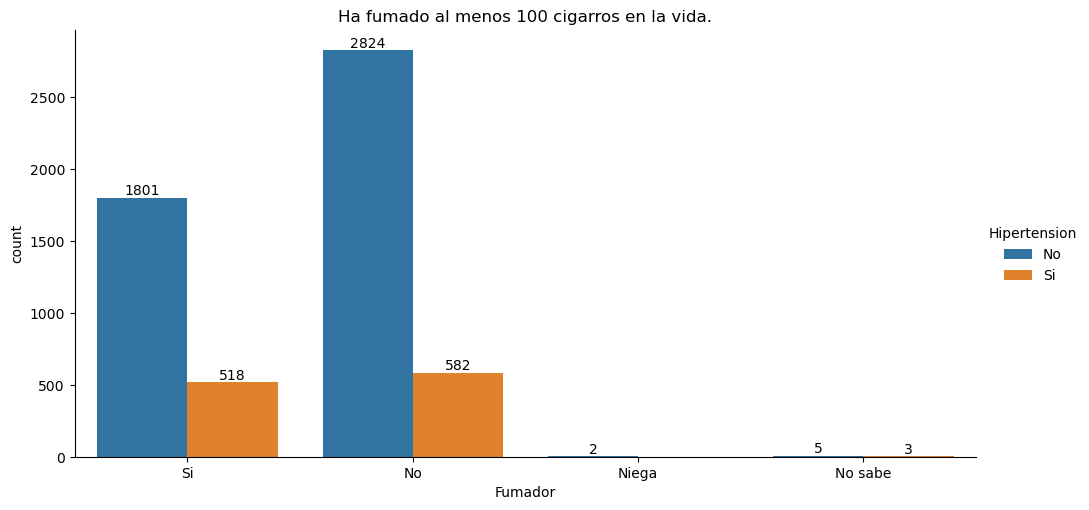

In [26]:
# Gráfica
g = sns.catplot(x='Fumador', data = data, kind='count', aspect=2, hue='Hipertension', legend = True)
g.set_xticklabels()
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Ha fumado al menos 100 cigarros en la vida.')
plt.show()

In [27]:
# Análisis
dx = data.loc[~data.Fumador.isin(['No sabe', 'Niega']), :]  # Eliminamos el valor 'No sabe', 'Niega' del análisis
dx = dx.groupby(['Hipertension'])['Fumador']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum()*100, axis=1)
print(dx.to_string(float_format="%.1f"))

Fumador        No   Si
Hipertension          
No           61.1 38.9
Si           52.9 47.1


*Conclusión*: De las personas que sufren hipertensión, el 47.1% Sí ha fumado al menos 100 cigarros en la vida sufren de hipertensión. Por tanto, no se observa una gran influencia del fumar.

Variable `Genero`.

In [28]:
# Reemplazamos los códigos por texto
data['Genero'] = data['Genero'].replace({1: "Masculino", 2: "Femenino"})

In [29]:
# Valores únicos
data['Genero'].value_counts(normalize=True, dropna=True)

Genero
Femenino     0.518919
Masculino    0.481081
Name: proportion, dtype: float64

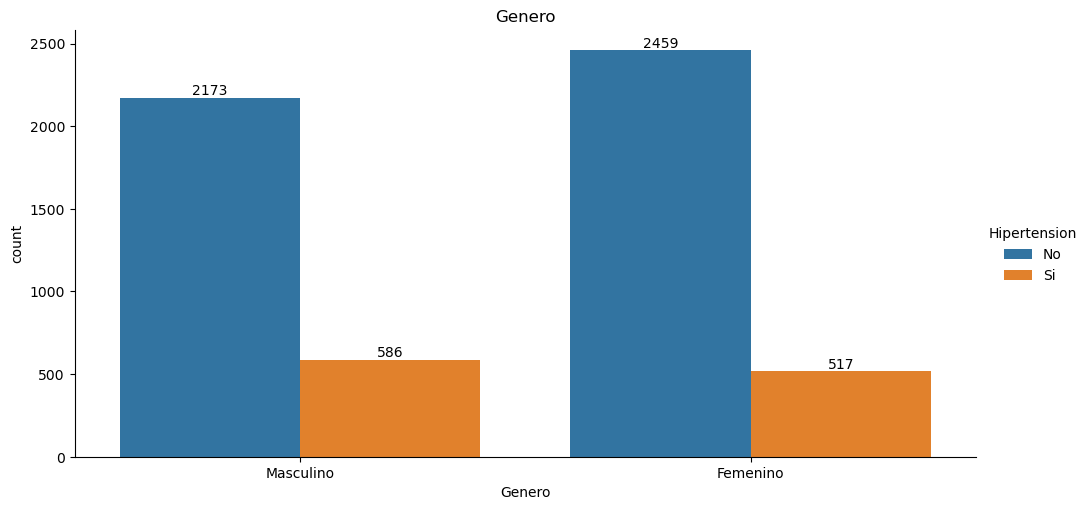

In [30]:
# Gráfica
g = sns.catplot(x='Genero', data = data, kind='count', aspect=2, hue='Hipertension', legend = True)
g.set_xticklabels()
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Genero')
plt.show()

In [31]:
# Análisis
dx = data
dx = dx.groupby(['Hipertension'])['Genero']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum()*100, axis=1)
print(dx.to_string(float_format="%.1f"))

Genero        Femenino  Masculino
Hipertension                     
No                53.1       46.9
Si                46.9       53.1


*Conclusión*: De las personas que sufren hipertensión, el 53.1% son del sexo másculino.

Variable `Raza`: Raza/Origen hispánico.

In [32]:
# Reemplazamos los códigos por texto
data['Raza'] = data['Raza'].replace({1: "Americano Mexicano",
                                     2: "Otros Hispanos",
                                     3: "Blancos No Hispanos",
                                     4: "Negros No Hipanos",
                                     5: "Otras razas"})

In [33]:
# Valores únicos
data['Raza'].value_counts(normalize=True, dropna=True)

Raza
Blancos No Hispanos    0.320663
Negros No Hipanos      0.213949
Americano Mexicano     0.177507
Otras razas            0.157105
Otros Hispanos         0.130776
Name: proportion, dtype: float64

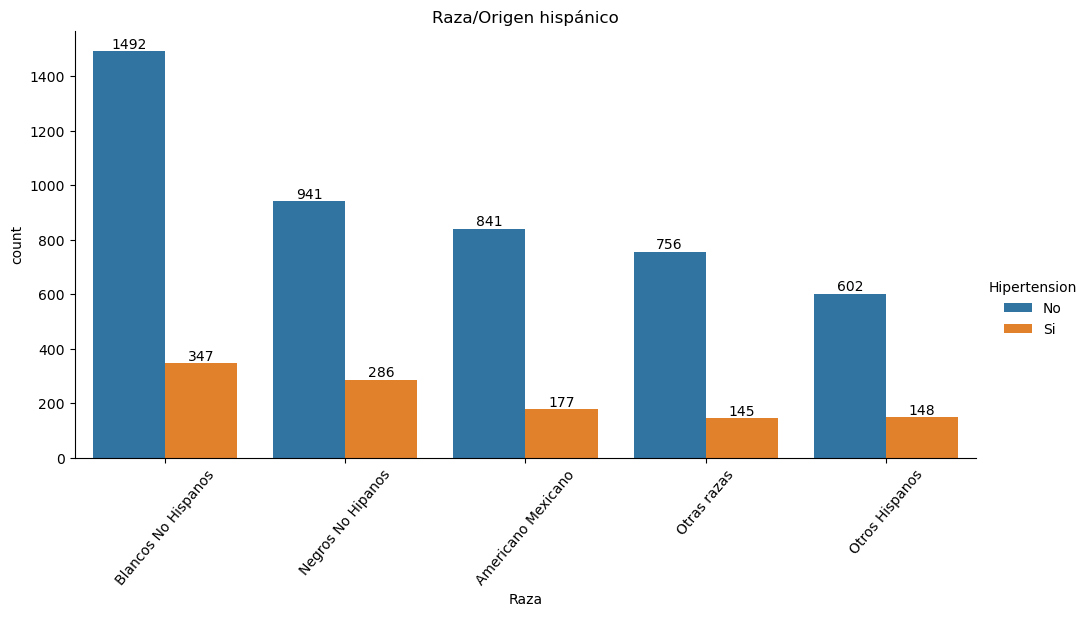

In [34]:
# Gráfica
g = sns.catplot(x='Raza', data = data, kind='count', aspect=2, hue='Hipertension', legend = True)
g.set_xticklabels(rotation=50)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Raza/Origen hispánico')
plt.show()

In [35]:
# Análisis
dx = data
dx = dx.groupby(['Hipertension'])['Raza']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum()*100, axis=1)
print(dx.to_string(float_format="%.1f"))

Raza          Americano Mexicano  Blancos No Hispanos  Negros No Hipanos  Otras razas  Otros Hispanos
Hipertension                                                                                         
No                          18.2                 32.2               20.3         16.3            13.0
Si                          16.0                 31.5               25.9         13.1            13.4


*Conclusión*: De las personas que sufren hipertensión, el mayor porcentaje es de la raza "Blancos No Hispanos" con un 31.5%, seguido de los "Negros No Hispanos" con un 25.9%.

Variable `Ciudadania`.

In [36]:
# Reemplazamos los códigos por texto
data['Ciudadania'] = data['Ciudadania'].replace({1: "Ciudadano",
                                     2: "No Ciudadano",
                                     7: "Niega",
                                     9: "No sabe"})

In [37]:
# Valores únicos
data['Ciudadania'].value_counts(normalize=True, dropna=True)

Ciudadania
Ciudadano       0.827694
No Ciudadano    0.170038
Niega           0.001395
No sabe         0.000872
Name: proportion, dtype: float64

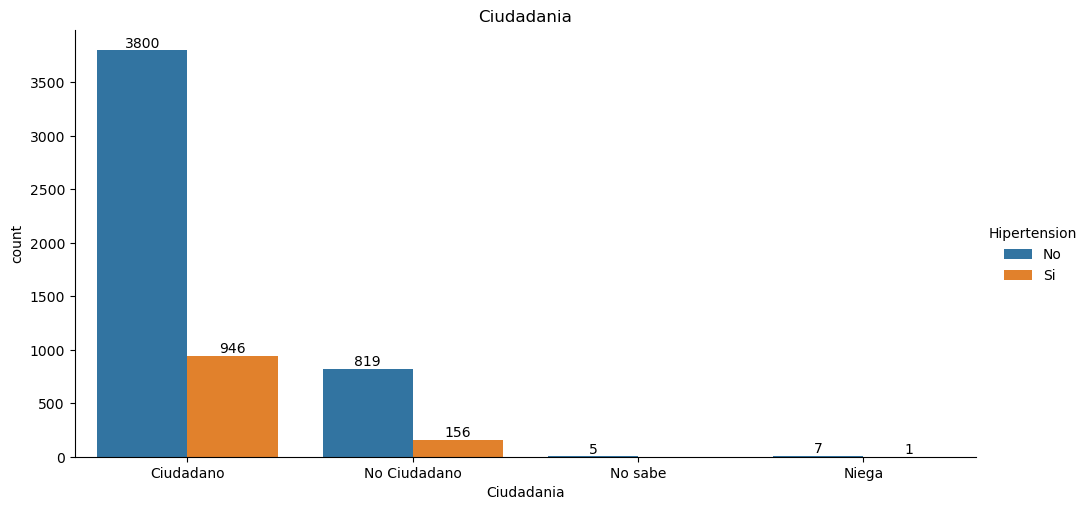

In [38]:
# Gráfica
g = sns.catplot(x='Ciudadania', data = data, kind='count', aspect=2, hue='Hipertension', legend = True)
g.set_xticklabels()
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Ciudadania')
plt.show()

In [39]:
# Análisis
dx = data.loc[~data.Ciudadania.isin(['No sabe', 'Niega']), :]  # Eliminamos el valor 'No sabe', 'Niega' del análisis
dx = dx.groupby(['Hipertension'])['Ciudadania']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum()*100, axis=1)
print(dx.to_string(float_format="%.1f"))

Ciudadania    Ciudadano  No Ciudadano
Hipertension                         
No                 82.3          17.7
Si                 85.8          14.2


*Conclusión*: De las personas que sufren hipertensión, el mayor porcentaje es Ciudadano Americano con un 85.8%.

Variable `Educacion`: Nivel de eduación.

In [40]:
# Reemplazamos los códigos por texto
data['Educacion'] = data['Educacion'].replace({1: "Menos 9no grado",
                                     2: "9-11 grado",
                                     3: "Graduado High School",
                                     4: "Universitario incompleto",
                                     5: "Universiario completo",
                                     7: "Niega",
                                     9: "No sabe"})

In [41]:
# Valores únicos
data['Educacion'].value_counts(normalize=True, dropna=True)

Educacion
Universitario incompleto    0.296127
Universiario completo       0.249543
Graduado High School        0.216661
Menos 9no grado             0.119657
9-11 grado                  0.117464
No sabe                     0.000548
Name: proportion, dtype: float64

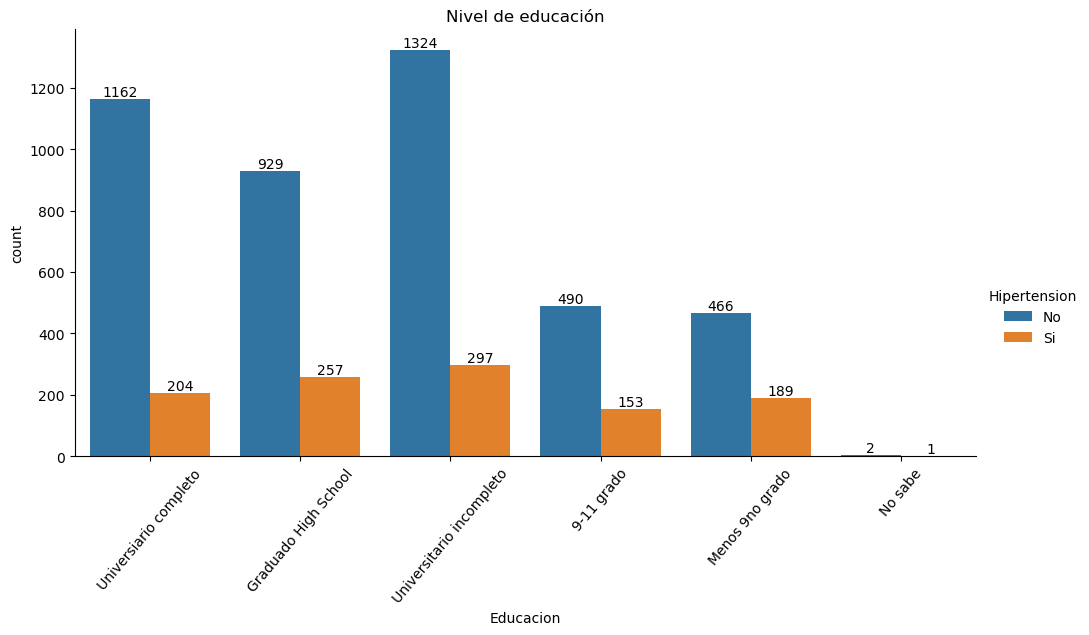

In [42]:
# Gráfica
g = sns.catplot(x='Educacion', data = data, kind='count', aspect=2, hue='Hipertension', legend = True)
g.set_xticklabels(rotation=50)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Nivel de educación')
plt.show()

In [43]:
# Análisis
dx = data.loc[~data.Educacion.isin(['No sabe', 'Niega']), :]  # Eliminamos el valor 'No sabe', 'Niega' del análisis
dx = dx.groupby(['Hipertension'])['Educacion']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum()*100, axis=1)
print(dx.to_string(float_format="%.1f"))

Educacion     9-11 grado  Graduado High School  Menos 9no grado  Universiario completo  Universitario incompleto
Hipertension                                                                                                    
No                  11.2                  21.3             10.7                   26.6                      30.3
Si                  13.9                  23.4             17.2                   18.5                      27.0


*Conclusión*: De las personas que sufren hipertensión, el mayor porcentaje es Universitario Incompleto con un 27%, seguido de Graduado High School con un 23.4%.

Variable `Estado`: Estado Marital.

In [44]:
# Reemplazamos los códigos por texto
data['Estado'] = data['Estado'].replace({1: "Casado",
                                     2: "Viudo",
                                     3: "Divorciado",
                                     4: "Separado",
                                     5: "Soltero",
                                     6: "Conviviente",
                                     77: "Niega",
                                     99: "No sabe"})

In [45]:
# Valores únicos
data['Estado'].value_counts(normalize=True, dropna=True)

Estado
Casado         0.507855
Soltero        0.183412
Divorciado     0.105773
Conviviente    0.096273
Viudo          0.072342
Separado       0.033979
Niega          0.000365
Name: proportion, dtype: float64

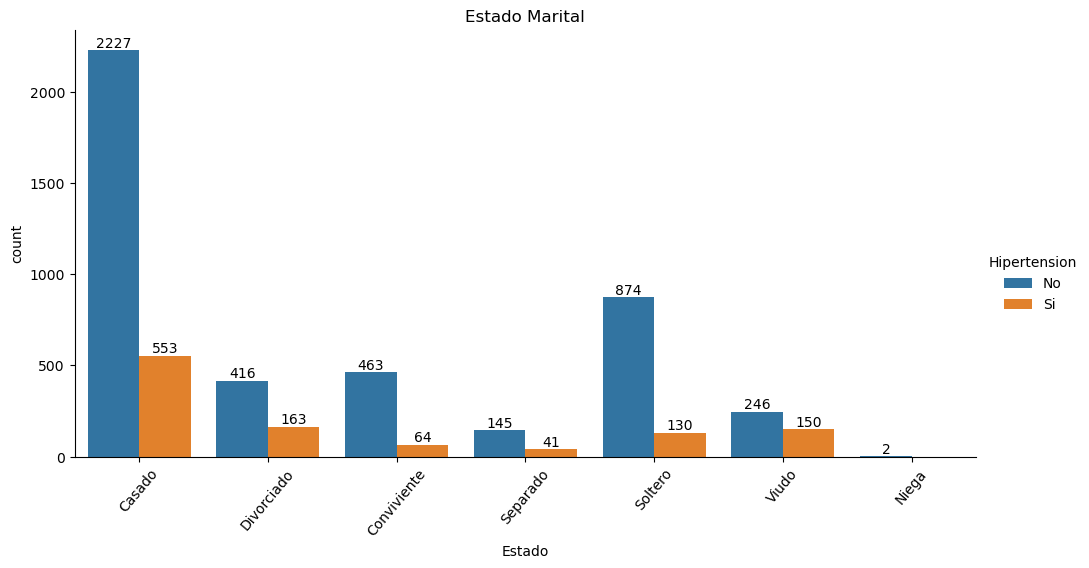

In [46]:
# Gráfica
g = sns.catplot(x='Estado', data = data, kind='count', aspect=2, hue='Hipertension', legend = True)
g.set_xticklabels(rotation=50)
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('Estado Marital')
plt.show()

In [47]:
# Análisis
dx = data.loc[~data.Estado.isin(['No sabe', 'Niega']), :]  # Eliminamos el valor 'No sabe', 'Niega' del análisis
dx = dx.groupby(['Hipertension'])['Estado']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum()*100, axis=1)
print(dx.to_string(float_format="%.1f"))

Estado        Casado  Conviviente  Divorciado  Separado  Soltero  Viudo
Hipertension                                                           
No              50.9         10.6         9.5       3.3     20.0    5.6
Si              50.2          5.8        14.8       3.7     11.8   13.6


*Conclusión*: De las personas que sufren hipertensión, la mitad se encuentra casada (50.2%).

### Variables cuantitativas

In [48]:
# Renombramos las variables
renombrar = {
             'RIDAGEYR': 'Edad',
             'DMDHHSIZ': 'Personas Hogar',
             'INDFMPIR': 'Ingresos',
             'BPXSY1': "Sistolica",
             'BPXDI1': 'Diastolica',
             'BMXWT': 'Peso',
             'BMXHT': 'Altura',
             'BMXBMI': 'IMC',
             'BMXLEG': 'Pierna',
             'BMXARML': 'Brazo Longitud',
             'BMXARMC': 'Brazo Circunferencia',
             'BMXWAIST': 'Muñeca'}
data.rename(columns=renombrar, inplace=True)

In [49]:
cuantitativas = ['Edad', 'Personas Hogar', 'Ingresos', 'Sistolica', 'Diastolica', 'Peso', 'Altura', 'IMC', 'Pierna', 'Brazo Longitud', 'Brazo Circunferencia', 'Muñeca']

In [50]:
data.describe().T

count        mean        std    min     25%     50%  \
Edad                  5735.0   48.052310  18.431011   18.0   32.00   48.00   
Personas Hogar        5735.0    3.323801   1.724670    1.0    2.00    3.00   
Ingresos              5134.0    2.403204   1.601995    0.0    1.06    1.98   
Sistolica             5401.0  125.084614  18.480873   82.0  112.00  122.00   
Diastolica            5401.0   69.516386  12.881575    0.0   62.00   70.00   
Peso                  5666.0   81.342676  21.764409   32.4   65.90   78.20   
Altura                5673.0  166.142834  10.079264  129.7  158.70  166.00   
IMC                   5662.0   29.382197   7.095921   14.5   24.30   28.30   
Pierna                5345.0   38.576782   3.873018   26.0   36.00   38.60   
Brazo Longitud        5427.0   37.146987   2.800784   28.2   35.20   37.10   
Brazo Circunferencia  5427.0   33.112235   5.268027   17.1   29.50   32.70   
Muñeca                5368.0   99.567213  16.844109   58.7   87.60   98.30   

                         75%    max  
Edad                   63.00   80.0  
Personas Hogar          5.00    7.0  
Ingresos                3.74    5.0  
Sistolica             134.00  236.0  
Diastolica             78.00  120.0  
Peso                   92.70  198.9  
Altura                173.50  202.7  
IMC                    33.00   67.3  
Pierna                 41.20   51.5  
Brazo Longitud         39.00   47.4  
Brazo Circunferencia   36.20   58.4  
Muñeca                109.30  171.6

Se observa diferencia de escalas en las variables.

In [51]:
# Sesgo
data[cuantitativas].skew() # 0: distribución simétrica, >0: sesgo a la derecha, <0: sesgo a la izquierda

Edad                    0.103646
Personas Hogar          0.538828
Ingresos                0.446663
Sistolica               1.040250
Diastolica             -0.620106
Peso                    1.014183
Altura                  0.082297
IMC                     1.109395
Pierna                 -0.026853
Brazo Longitud          0.066277
Brazo Circunferencia    0.517957
Muñeca                  0.586845
dtype: float64

Las variables con una mayor distribución simétrica son `Altura`, `Pierna` y `Brazo Longitud`, ya que tienen valores de sesgo cercanos a cero.

Veamos las variables gráficamente.

Variable `Edad`

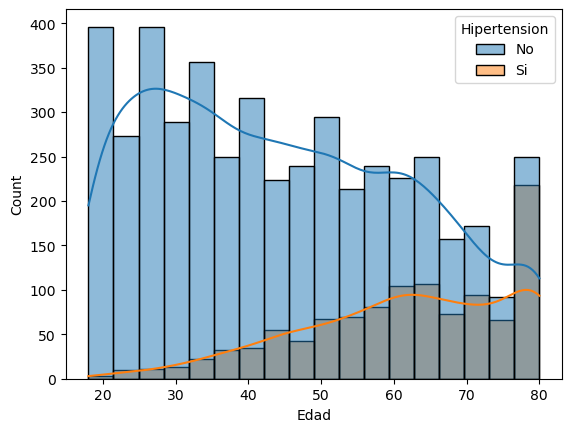

In [52]:
g = sns.histplot(x='Edad', data = data, hue='Hipertension', kde = True)
plt.show()

In [53]:
# Datos descriptivos
data.groupby('Hipertension')['Edad'].describe().T

Hipertension           No           Si
count         4632.000000  1103.000000
mean            44.854922    61.479601
std             17.802829    14.568297
min             18.000000    18.000000
25%             29.000000    51.500000
50%             43.000000    63.000000
75%             59.000000    74.000000
max             80.000000    80.000000

*Conclusión:* No se observa una tendencia central  tanto para hipertensos y no hipertensos. Los datos de máximo y mínimo de la variable son consistentes. Para los no hipertensos una distribución asimétrica ligeramente positiva, con bastante dispersión en los datos. Para los hipertensos una distribución asimétrica negativa, con una mayor proporción de hipertensos que aumenta conforme la persona es más anciana. La mediana de personas hipertensas es 62 años.

Variable `Personas Hogar`

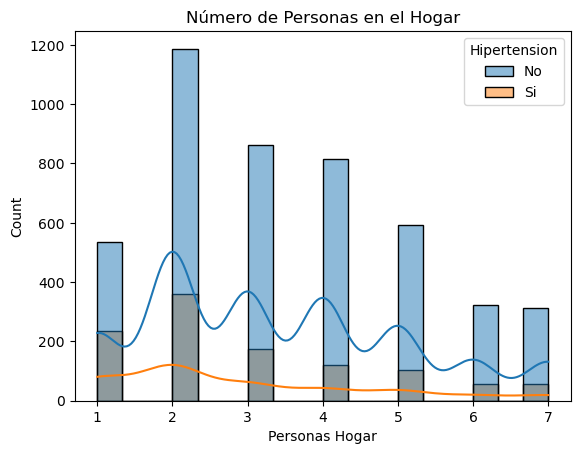

In [54]:
g = sns.histplot(x='Personas Hogar', data = data, hue='Hipertension', kde = True)
plt.title('Número de Personas en el Hogar')
plt.show()

Para una mejor visualización creamos un diagrama de barras (similar a una variable cualitativa).

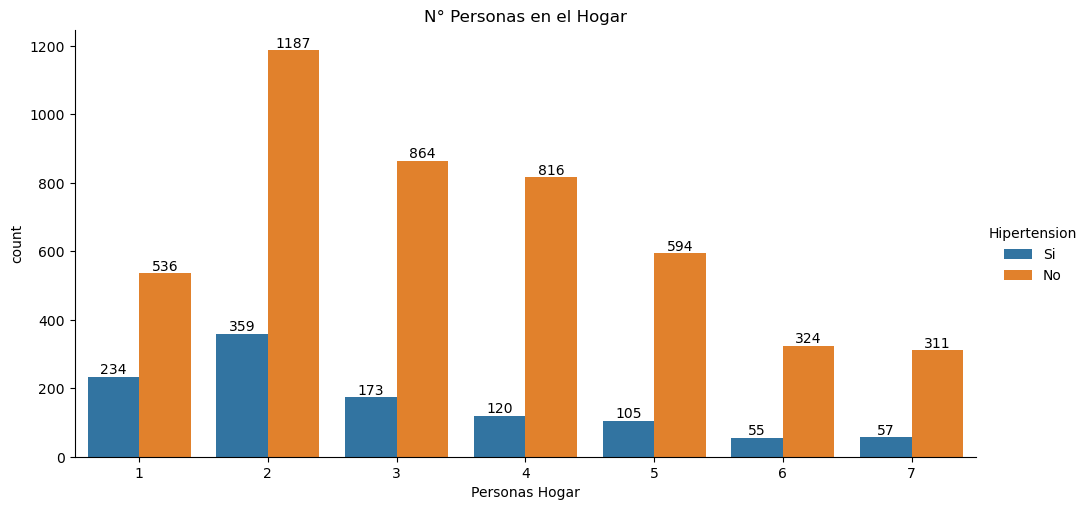

In [55]:
# Gráfica
g = sns.catplot(x='Personas Hogar', data = data, kind='count', aspect=2, hue='Hipertension', legend = True)
g.set_xticklabels()
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.0f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.title('N° Personas en el Hogar')
plt.show()

In [56]:
# Datos descriptivos
data.groupby('Hipertension')['Personas Hogar'].describe().T

Hipertension           No           Si
count         4632.000000  1103.000000
mean             3.423359     2.905712
std              1.712731     1.712608
min              1.000000     1.000000
25%              2.000000     2.000000
50%              3.000000     2.000000
75%              5.000000     4.000000
max              7.000000     7.000000

*Conclusión:* No se observa una tendencia central  tanto para hipertensos y no hipertensos. En ambos casos los datos se concentran alrededor de 2 a 3 personas por hogar. Los datos de máximo y mínimo de la variable son consistentes. Para los hipertensos y no hipertensos se tiene una distribución asimétrica ligeramente positiva.

Variable `Ingresos` (Relación de Ingresos a Pobreza)

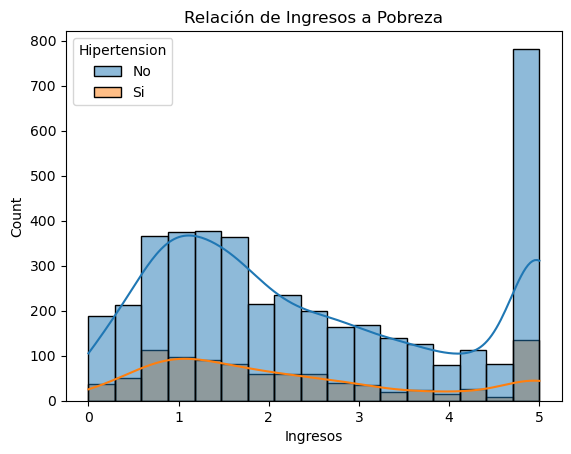

In [57]:
g = sns.histplot(x='Ingresos', data = data, hue='Hipertension', kde = True)
plt.title('Relación de Ingresos a Pobreza')
plt.show()

In [58]:
# Datos descriptivos
data.groupby('Hipertension')['Ingresos'].describe().T

Hipertension           No          Si
count         4181.000000  953.000000
mean             2.446561    2.212991
std              1.617522    1.518263
min              0.000000    0.000000
25%              1.070000    0.980000
50%              2.040000    1.790000
75%              3.870000    3.120000
max              5.000000    5.000000

*Conclusión:* No se observa una tendencia central tanto para hipertensos y no hipertensos. En ambos casos los datos se concentran alrededor de 1, sin embargo, hay un pico en 5 ya que incluyen los mayores a 5 también. Los datos de máximo y mínimo de la variable son consistentes. Para los hipertensos y no hipertensos se tiene una distribución asimétrica ligeramente positiva.

Variable `Sistolica`(Presión)

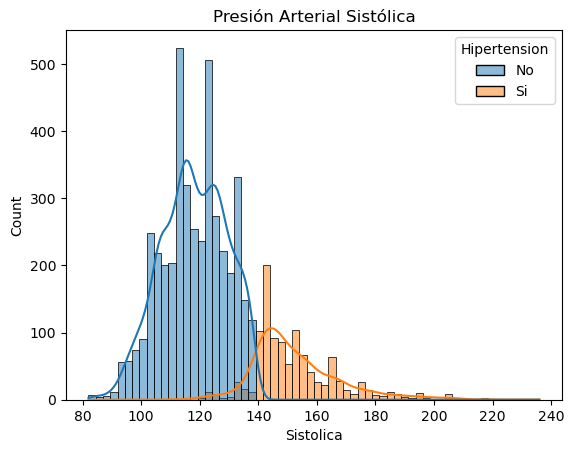

In [59]:
g = sns.histplot(x='Sistolica', data = data, hue='Hipertension', kde = True)
plt.title('Presión Arterial Sistólica')
plt.show()

In [60]:
# Datos descriptivos
data.groupby('Hipertension')['Sistolica'].describe().T

Hipertension           No           Si
count         4298.000000  1103.000000
mean           117.997208   152.701723
std             11.127375    15.215478
min             82.000000   110.000000
25%            110.000000   142.000000
50%            118.000000   148.000000
75%            126.000000   158.000000
max            138.000000   236.000000

*Conclusión:* Se observa una tendencia ligeramente central tanto para hipertensos y no hipertensos. En los hipertensos los datos se concentran en 150 mmHg, mientras para los no hipertensos en 118 mmHg, con una diferencia entre ambos de 32 mmHg aproximadamente. Los datos de máximo y mínimo de la variable son consistentes. Para los hipertensos se tiene una distribución asimétrica positiva y para los no hipertensos una distribución ligeramente asimétrica negativa.

Variable `Diastolica`(Presión)

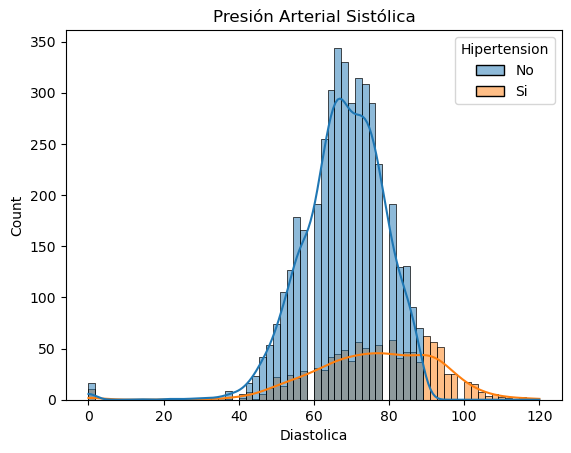

In [61]:
g = sns.histplot(x='Diastolica', data = data, hue='Hipertension', kde = True)
plt.title('Presión Arterial Sistólica')
plt.show()

In [62]:
# Datos descriptivos
data.groupby('Hipertension')['Diastolica'].describe().T

Hipertension           No           Si
count         4298.000000  1103.000000
mean            67.771056    76.317316
std             11.011141    16.797852
min              0.000000     0.000000
25%             62.000000    66.000000
50%             68.000000    78.000000
75%             76.000000    90.000000
max             88.000000   120.000000

*Conclusión:* Se observa una tendencia ligeramente central tanto para hipertensos y no hipertensos. En los hipertensos los datos se concentran en 78 mmHg, mientras para los no hipertensos en 68 mmHg, con una diferencia entre ambos de 10 mmHg aproximadamente. Los datos de máximo de la variable son consistentes. El valor mínimo de 0 mmHg no es consistente, incluso se tienen casos de hipertensos. Para los hipertensos y no hipertensos se tiene una distribución ligeramente asimétrica negativa.

Variable `Peso`

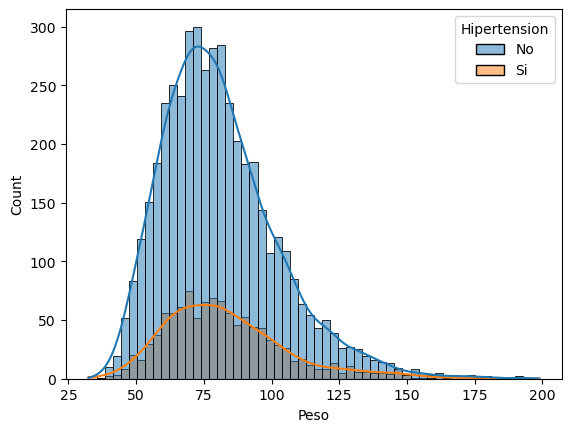

In [63]:
g = sns.histplot(x='Peso', data = data, hue='Hipertension', kde = True)
plt.show()

In [64]:
# Datos descriptivos
data.groupby('Hipertension')['Peso'].describe().T

Hipertension           No           Si
count         4576.000000  1090.000000
mean            80.872662    83.315872
std             21.384445    23.198627
min             37.000000    32.400000
25%             65.600000    66.825000
50%             77.900000    79.600000
75%             92.400000    94.775000
max            192.300000   198.900000

*Conclusión:* Se observa una tendencia casi central tanto para hipertensos (media/mediana en 84/81) y no hipertensos (media/mediana en 80/77), con una distribución asimétrica ligeramente positiva en ambos casos. En promedio las personas hipertensas pesan 4 kg más que las no hipertensas. Se observa en el estudio que hay personas muy obesas (>170 kg).

Variable `Altura`

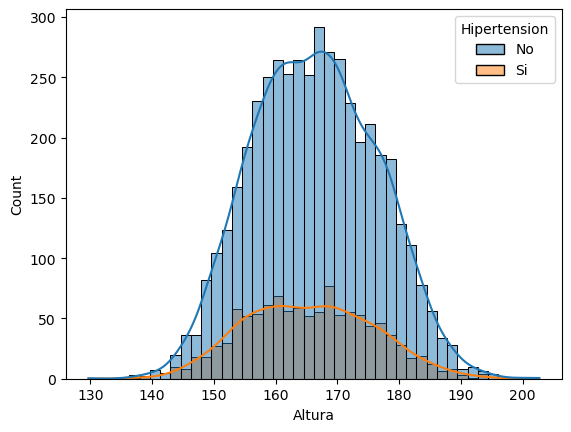

In [65]:
g = sns.histplot(x='Altura', data = data, hue='Hipertension', kde = True)
plt.show()

In [66]:
# Datos descriptivos
data.groupby('Hipertension')['Altura'].describe().T

Hipertension           No           Si
count         4581.000000  1092.000000
mean           166.304082   165.466392
std             10.040747    10.216201
min            129.700000   137.400000
25%            158.900000   157.800000
50%            166.200000   165.250000
75%            173.600000   173.025000
max            202.700000   194.300000

*Conclusión:* Se observa una tendencia central tanto para hipertensos y no hipertensos y se concentran alrededor de una altura de 166 cm aproximadamente, con una distribución simétrica (normal). Se observa que en el estudio hay personas bastante altas (>190 cm).

Variable `IMC`

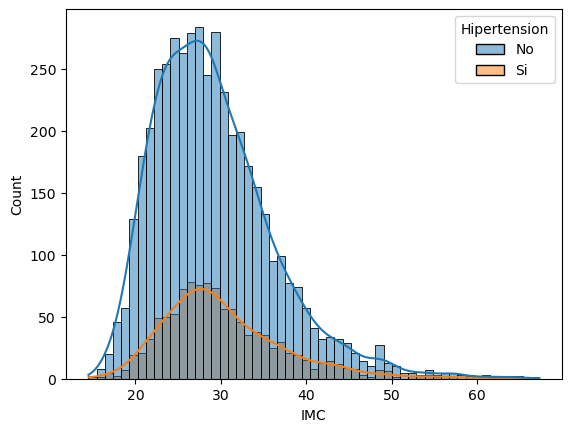

In [67]:
g = sns.histplot(x='IMC', data = data, hue='Hipertension', kde=True)
plt.show('Índice de Masa Corporal')
plt.show()

In [68]:
# Datos descriptivos
data.groupby('Hipertension')['IMC'].describe().T

Hipertension           No           Si
count         4573.000000  1089.000000
mean            29.176624    30.245455
std              7.082175     7.091814
min             15.100000    14.500000
25%             24.000000    25.500000
50%             28.100000    28.900000
75%             32.900000    33.900000
max             67.300000    64.500000

*Conclusión:* Se observa una tendencia casi central tanto para hipertensos (media/mediana en 30/29) y no hipertensos (media/mediana en 29/28), con una distribución asimétrica ligeramente positiva en ambos casos. En promedio las personas hipertensas tienen un IMC de 1 por encima de las no hipertensas. Se observa en el estudio que hay personas de bajo peso (<18.5) y muy obesas (>40).

Variable `Pierna`

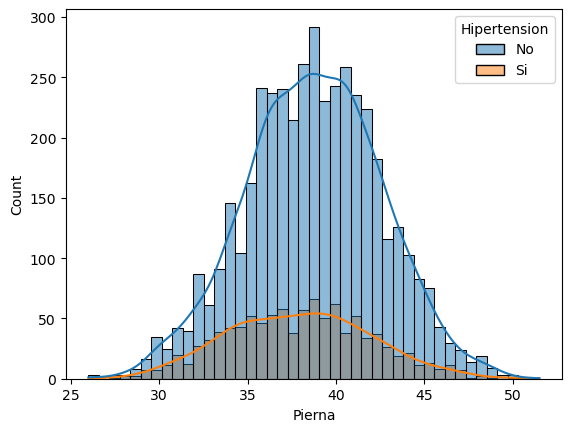

In [69]:
g = sns.histplot(x='Pierna', data = data, hue='Hipertension', kde=True)
plt.show()

In [70]:
# Datos descriptivos
data.groupby('Hipertension')['Pierna'].describe().T

Hipertension           No           Si
count         4334.000000  1011.000000
mean            38.727619    37.930168
std              3.825396     4.008961
min             26.000000    27.400000
25%             36.100000    35.000000
50%             38.800000    38.000000
75%             41.400000    40.800000
max             51.500000    51.100000

*Conclusión:* Se observa una tendencia central tanto para hipertensos y no hipertensos y se concentran alrededor de una longitud de pierna 38 cm aproximadamente, con una distribución simétrica (normal). Los datos de máximo y mínimo de la variable son consistentes.

Variable `Brazo Longitud`

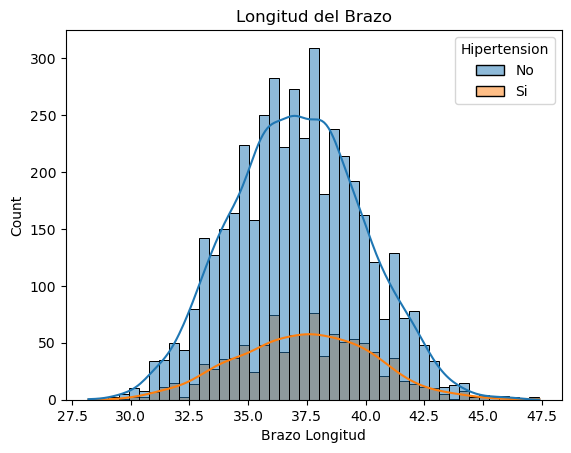

In [71]:
g = sns.histplot(x='Brazo Longitud', data = data, hue='Hipertension', kde=True)
plt.title('Longitud del Brazo')
plt.show()

In [72]:
# Datos descriptivos
data.groupby('Hipertension')['Brazo Longitud'].describe().T

Hipertension           No           Si
count         4392.000000  1035.000000
mean            37.088229    37.396329
std              2.782199     2.866306
min             28.200000    29.700000
25%             35.100000    35.500000
50%             37.000000    37.500000
75%             39.000000    39.400000
max             46.300000    47.400000

*Conclusión:* Se observa una tendencia central tanto para hipertensos y no hipertensos y se concentran alrededor de una longitud de brazo 37 cm aproximadamente, con una distribución simétrica (normal). Los datos de máximo y mínimo de la variable son consistentes.

Variable `Brazo Circunferencia`

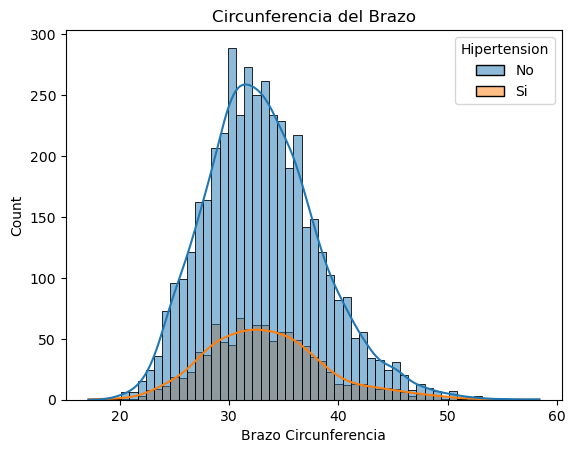

In [73]:
g = sns.histplot(x='Brazo Circunferencia', data = data, hue='Hipertension', kde=True)
plt.title('Circunferencia del Brazo')
plt.show()

In [74]:
# Datos descriptivos
data.groupby('Hipertension')['Brazo Circunferencia'].describe().T

Hipertension           No           Si
count         4392.000000  1035.000000
mean            33.046311    33.391981
std              5.218702     5.466147
min             19.900000    17.100000
25%             29.500000    29.500000
50%             32.600000    33.000000
75%             36.200000    36.500000
max             58.400000    52.500000

*Conclusión:* Se observa una tendencia central tanto para hipertensos y no hipertensos y se concentran alrededor de una circunferencia de brazo de 33 cm aproximadamente, con una distribución simétrica (normal). Los datos de máximo y mínimo de la variable son consistentes.

Variable `Muñeca`

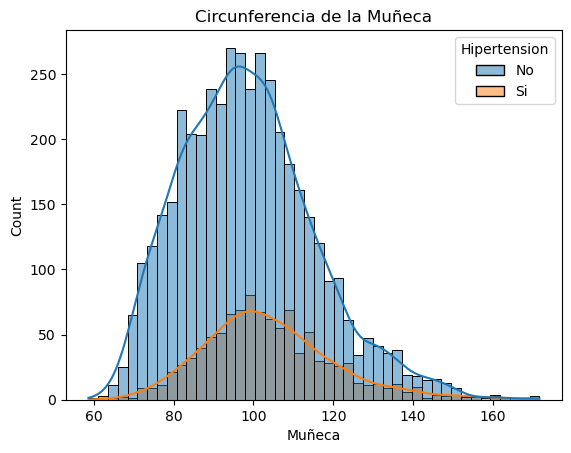

In [75]:
g = sns.histplot(x='Muñeca', data = data, hue='Hipertension', kde=True)
plt.title('Circunferencia de la Muñeca')
plt.show()

In [76]:
# Datos descriptivos
data.groupby('Hipertension')['Muñeca'].describe().T

Hipertension           No           Si
count         4352.000000  1016.000000
mean            98.560685   103.878642
std             16.838682    16.181363
min             58.700000    64.000000
25%             86.200000    93.175000
50%             97.200000   101.950000
75%            108.425000   113.000000
max            171.600000   164.000000

*Conclusión:* Se observa una tendencia casi central tanto para hipertensos (media/mediana en 104/103) y no hipertensos (media/mediana en 98/97), con una distribución asimétrica ligeramente positiva en ambos casos. En promedio hay una diferencia de 6 cm entre personas hipertensas y no hipertensas.

## Exploración de dos variables

### Asociación entre variables cuantitativas

No consideramos la variable `Personas Hogar` por tener valores discretos del 1 al 7.

In [77]:
cuantitativas.remove('Personas Hogar')

Ahora graficamos entre pares de variables

<Figure size 2500x2500 with 0 Axes>

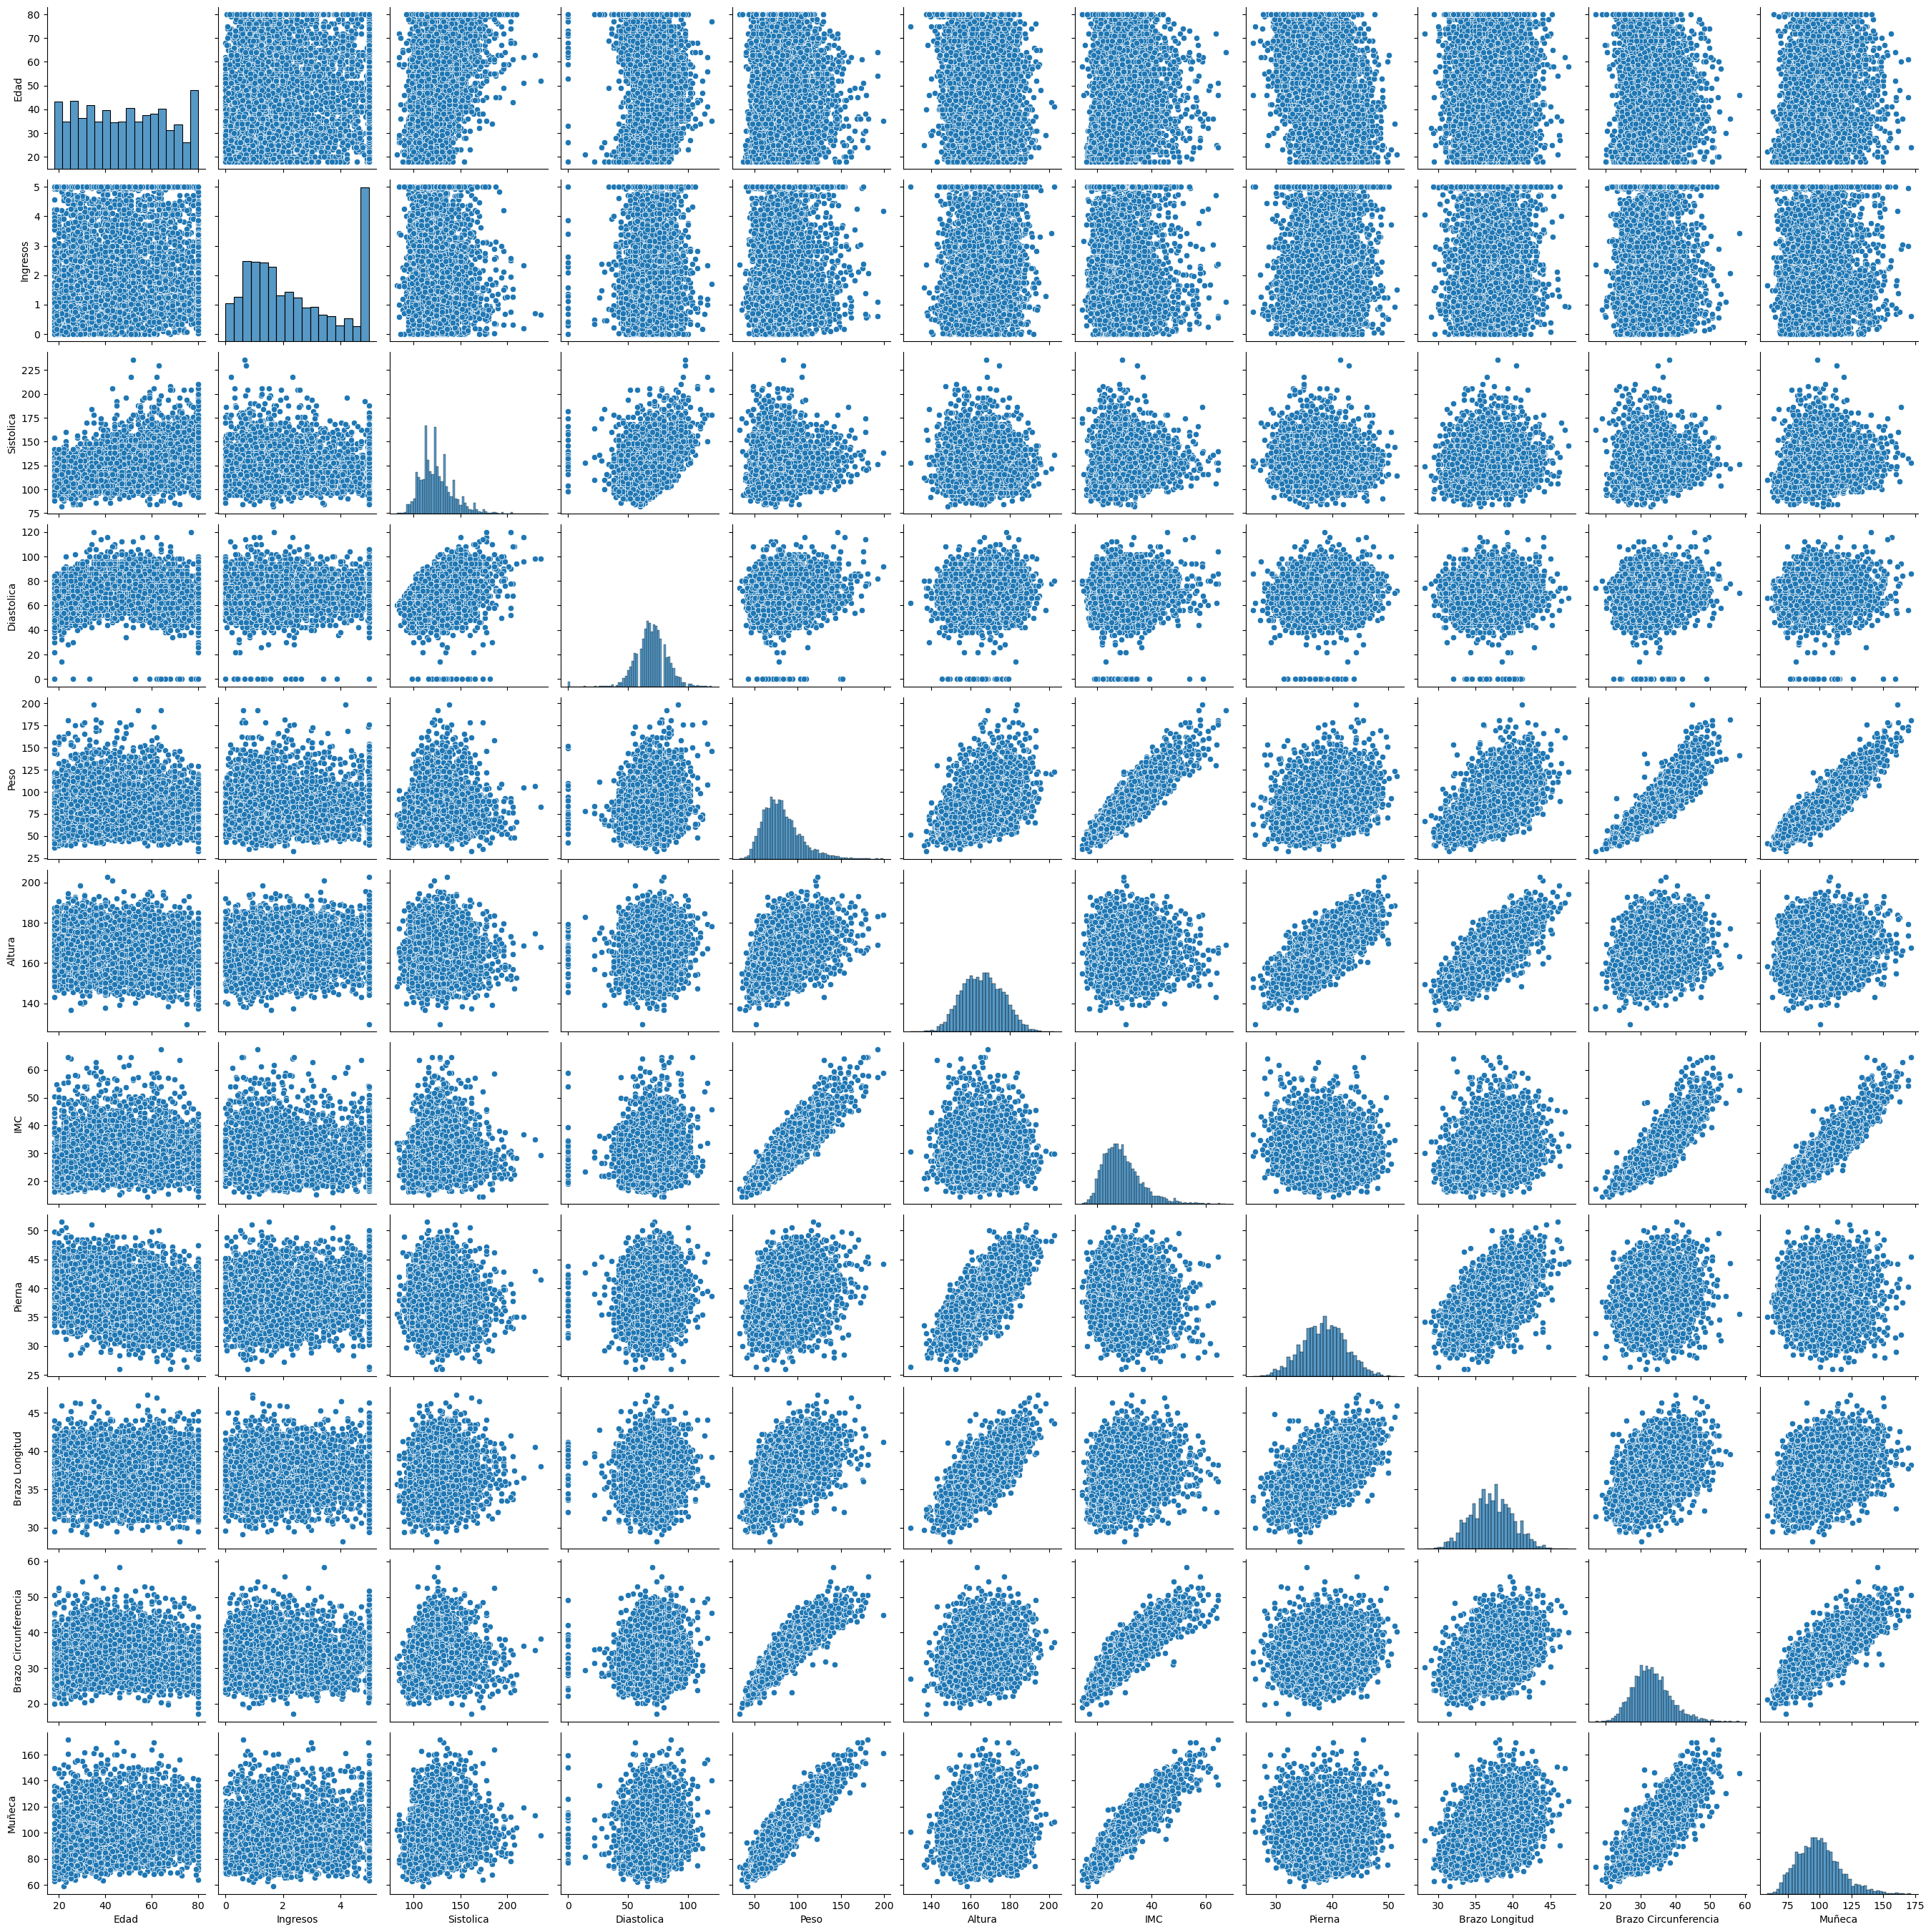

In [78]:
# Gráfica entre pares de variables
plt.figure(figsize=(25,25))
g = sns.pairplot(data.drop(columns='Personas Hogar'))
plt.show()

Se observa una relación lineal positiva entre la variable `Peso` con `IMC`, `Brazo Circunferencia` y `Muñeca`. La relación entre `Peso` e `IMC` es de esperarse por la formula que los relaciona.

Igualmente una relación lineal positiva entre la variable `Altura` con `Pierna` y `Brazo Longitud`.

También una relación lineal positiva entre la variable `IMC` con `Brazo Circunferencia` y `Muñeca`

En menor medida se observa una correlación positiva entre las presiones arteriales `Sistolica` y `Diastolica`.

Codificamos la variable target `Hipertension`

In [79]:
data['Hipertension'] = np.where(data['Hipertension']=="Si", 1, 0)

Ahora la añadimos a la lista de variables cuantitativas para luego graficar la matriz de correlación.

In [80]:
cuantitativas.append('Hipertension')

Matriz de correlación

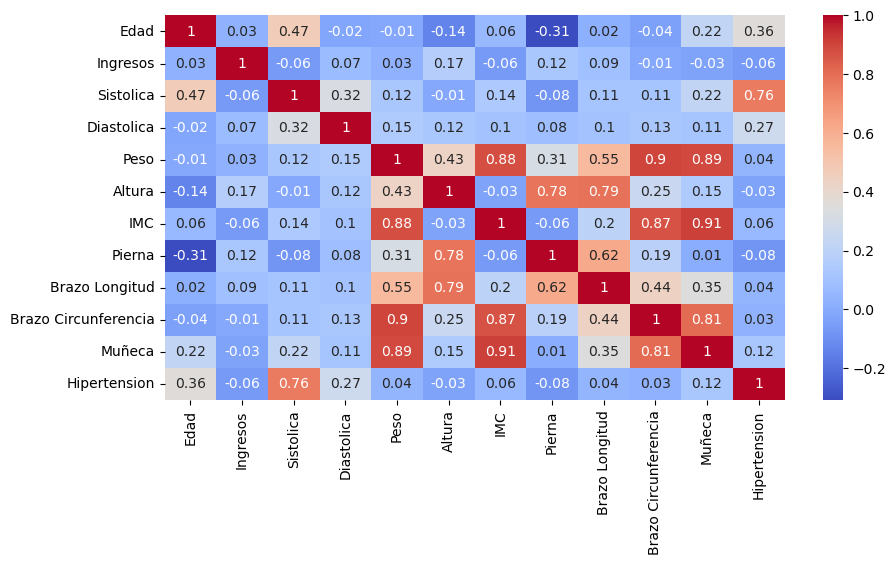

In [81]:
# Matriz de correlación
data_corr = data[cuantitativas].corr().apply(lambda x: round(x,2))
plt.figure(figsize=(10,5))
sns.heatmap(data_corr,
            annot=True,
            cmap='coolwarm')
plt.show()

Tomando un umbral de 0.8, las variables que tienen una fuerte correlación son:
* `Peso` e `IMC`: 0.88. Como el `IMC` tiene mayor correlación con `Hipertension`, eliminamos `Peso`.
* `IMC` y `Brazo Circunferencia`: 0.87. Como el `IMC` tiene mayor correlación con `Hipertension`, elimnamos `Brazo Circunferencia`.
* `IMC` y `Muñeca`: 0.91. Como `Muñeca` tiene mayor correlación con `Hipertensión`, elimiminamos `IMC`.

Por otro lado, se observa una mayor correlación de la presión arterial sistólica (0.76) que la diastólica (0.27) con respecto al target `Hipertensión`.

In [82]:
# Eliminamos las variables con fuerte correlación
data.drop(columns=['Peso', 'Brazo Circunferencia', 'IMC'], inplace=True)
data.head()

Alcohol Fumador     Genero  Edad                 Raza    Ciudadania  \
0      Si      Si  Masculino    62  Blancos No Hispanos     Ciudadano   
1      Si      Si  Masculino    53  Blancos No Hispanos  No Ciudadano   
2      Si      Si  Masculino    78  Blancos No Hispanos     Ciudadano   
3      No      No   Femenino    56  Blancos No Hispanos     Ciudadano   
4      No      No   Femenino    42    Negros No Hipanos     Ciudadano   

                  Educacion       Estado  Personas Hogar  Ingresos  Sistolica  \
0     Universiario completo       Casado               2      4.39      128.0   
1      Graduado High School   Divorciado               1      1.32      146.0   
2      Graduado High School       Casado               2      1.51      138.0   
3     Universiario completo  Conviviente               1      5.00      132.0   
4  Universitario incompleto   Divorciado               5      1.23      100.0   

   Diastolica  Altura  Pierna  Brazo Longitud  Muñeca  Hipertension  
0        70.0   184.5    43.3            43.6   101.1             0  
1        88.0   171.4    38.0            40.0   107.9             1  
2        46.0   170.1    35.6            37.0   116.5             0  
3        72.0   160.9    38.5            37.7   110.1             0  
4        70.0   164.9    37.4            36.0    80.4             0

In [83]:
# Tamaño de los datos
print('Número de variables: {}'.format(data.shape[1]))
print('Número de observaciones: {}'.format(data.shape[0]))

Número de variables: 17
Número de observaciones: 5735


Volvemos a remover la variable target de la lista de cuantitativas.

In [84]:
cuantitativas.remove('Hipertension')

Volvemos a categorizar la variable target

In [85]:
data['Hipertension'] = np.where(data['Hipertension']==1, "Si", "No")

Graficamente se observa una fuerte correlación positiva entre las variables `Altura`, `Pierna` y `Brazo Longitud`. Igualmente se observa una correlación positiva entre las presiones arteriales `Sistolica` y `Diastolica`.

Analicemos estas variables más profundamente.

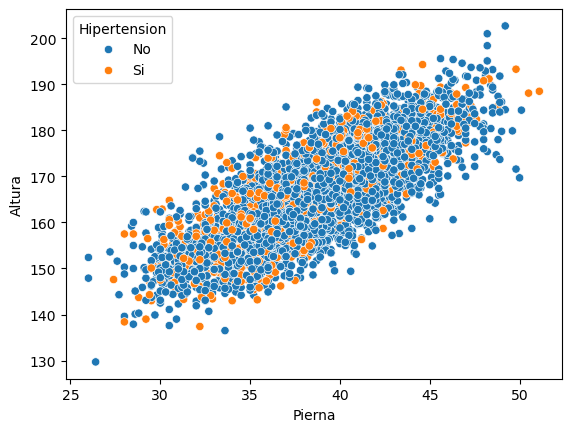

In [86]:
sns.scatterplot(data=data, x="Pierna", y="Altura", hue="Hipertension")
plt.show()

*Conclusión:* Se observa una relación lineal positiva bastante fuerte.

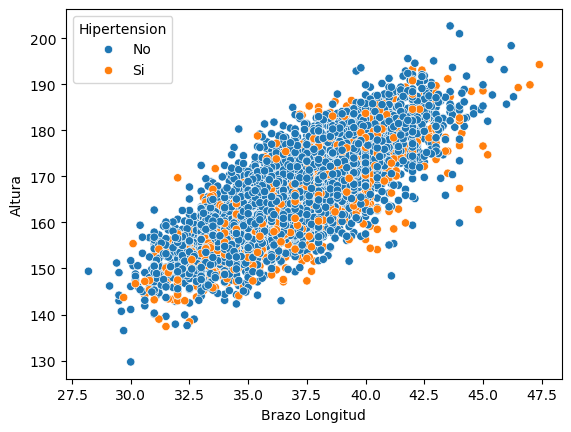

In [87]:
sns.scatterplot(data=data, x="Brazo Longitud", y="Altura", hue="Hipertension")
plt.show()

*Conclusión:* Se observa una relación lineal positiva bastante fuerte.

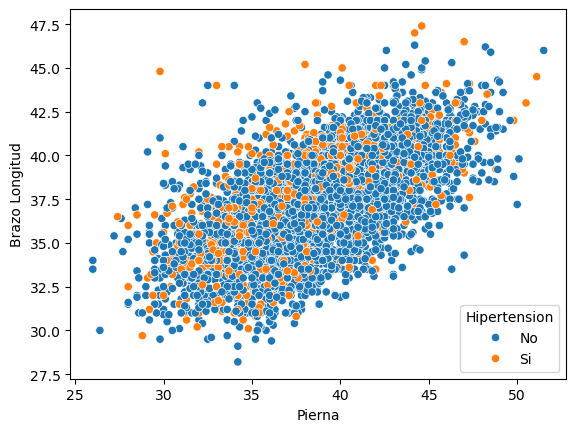

In [88]:
sns.scatterplot(data=data, x="Pierna", y="Brazo Longitud", hue="Hipertension")
plt.show()

*Conclusión:* Se observa una relación lineal positiva moderadamente fuerte, con una mayor dispersión de los datos.

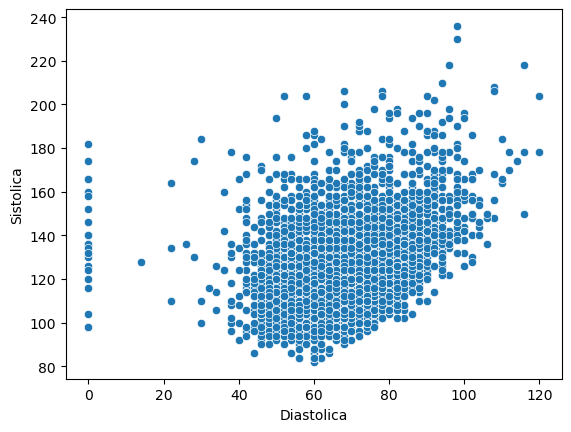

In [89]:
sns.scatterplot(data=data, x="Diastolica", y="Sistolica")
plt.show()

*Conclusión:* Se observa una relación lineal positiva debil con mayor dispersión que los casos anteriores, con datos raros para una presión arterial diastólica de 0 mmHg.

### Asociación entre variables cualitativas

### Test Chi Cuadrado

In [90]:
data.head()

Alcohol Fumador     Genero  Edad                 Raza    Ciudadania  \
0      Si      Si  Masculino    62  Blancos No Hispanos     Ciudadano   
1      Si      Si  Masculino    53  Blancos No Hispanos  No Ciudadano   
2      Si      Si  Masculino    78  Blancos No Hispanos     Ciudadano   
3      No      No   Femenino    56  Blancos No Hispanos     Ciudadano   
4      No      No   Femenino    42    Negros No Hipanos     Ciudadano   

                  Educacion       Estado  Personas Hogar  Ingresos  Sistolica  \
0     Universiario completo       Casado               2      4.39      128.0   
1      Graduado High School   Divorciado               1      1.32      146.0   
2      Graduado High School       Casado               2      1.51      138.0   
3     Universiario completo  Conviviente               1      5.00      132.0   
4  Universitario incompleto   Divorciado               5      1.23      100.0   

   Diastolica  Altura  Pierna  Brazo Longitud  Muñeca Hipertension  
0        70.0   184.5    43.3            43.6   101.1           No  
1        88.0   171.4    38.0            40.0   107.9           Si  
2        46.0   170.1    35.6            37.0   116.5           No  
3        72.0   160.9    38.5            37.7   110.1           No  
4        70.0   164.9    37.4            36.0    80.4           No

Variable `Genero` vs`Estado`

Inspeccionando una primera variable cualitativa:

In [91]:
data['Genero'].value_counts()

Genero
Femenino     2976
Masculino    2759
Name: count, dtype: int64

Inspeccionando una segunda variable cualitativa:

In [92]:
data['Estado'].value_counts()

Estado
Casado         2780
Soltero        1004
Divorciado      579
Conviviente     527
Viudo           396
Separado        186
Niega             2
Name: count, dtype: int64

Formando a partir de ellas un tabla cruzada:

In [93]:
db = data.loc[(data.Estado != "No sabe") & (data.Estado != "Niega"), :]
observados = pd.crosstab(index=db['Genero'], columns=db['Estado'], margins=True)
observados

Estado     Casado  Conviviente  Divorciado  Separado  Soltero  Viudo   All
Genero                                                                    
Femenino     1303          262         350       118      520    296  2849
Masculino    1477          265         229        68      484    100  2623
All          2780          527         579       186     1004    396  5472

Llamando a la libreria de la **prueba chi cuadrado**:

In [94]:
from scipy.stats import chi2_contingency

Aplicandole la prueba a la tabla de contingencia generada:

In [95]:
test=chi2_contingency(observados)

Mostrando los resultados de la prueba, de manera directa:

In [96]:
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%test)

chisq-statistic=138.8390, p-value=0.0000, df=12 expected_frep=[[1447.40862573  274.38285819  301.4566886    96.84100877  522.73318713
   206.17763158 2849.        ]
 [1332.59137427  252.61714181  277.5433114    89.15899123  481.26681287
   189.82236842 2623.        ]
 [2780.          527.          579.          186.         1004.
   396.         5472.        ]]


Como el p-value < 0.05, hay diferencias significativas: Hay relación entre variables.

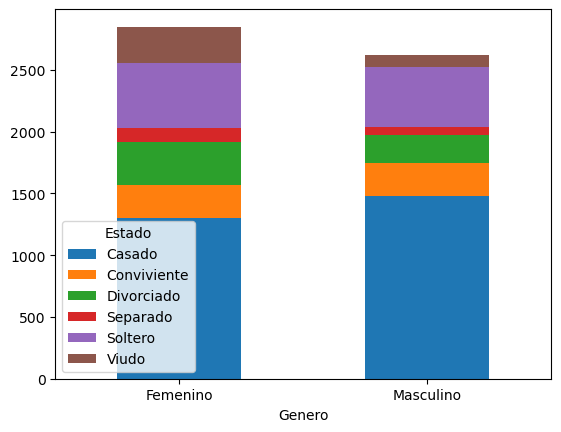

In [97]:
# Grafica de barra
observados.iloc[0:2,0:6].plot(kind='bar', stacked=True, rot=0)
plt.show()

*Conclusion:* En ambos generos se observa mayor cantidad de personas casadas, seguidas de las personas solteras. Para las mujeres se observa mayor cantidad de divorciadas. Además se observa cantidades similares de convivientes en ambos generos.

Variable `Genero` vs`Educacion`

In [98]:
# Primera variable cualitativa
data['Genero'].value_counts()

Genero
Femenino     2976
Masculino    2759
Name: count, dtype: int64

In [99]:
# Segunda variable cualitativa
data['Educacion'].value_counts()

Educacion
Universitario incompleto    1621
Universiario completo       1366
Graduado High School        1186
Menos 9no grado              655
9-11 grado                   643
No sabe                        3
Name: count, dtype: int64

In [100]:
# Tabla cruzada
db = data.loc[(data.Educacion != "No sabe"), :]
observados = pd.crosstab(index=db['Genero'], columns=db['Educacion'], margins=True)
observados

Educacion  9-11 grado  Graduado High School  Menos 9no grado  \
Genero                                                         
Femenino          291                   583              349   
Masculino         352                   603              306   
All               643                  1186              655   

Educacion  Universiario completo  Universitario incompleto   All  
Genero                                                            
Femenino                     717                       909  2849  
Masculino                    649                       712  2622  
All                         1366                      1621  5471

In [101]:
# Aplicando Chi cuadrado
test=chi2_contingency(observados)

In [102]:
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%test)

chisq-statistic=26.9013, p-value=0.0027, df=10 expected_frep=[[ 334.83951746  617.60445988  341.08846646  711.33869494  844.12886127
  2849.        ]
 [ 308.16048254  568.39554012  313.91153354  654.66130506  776.87113873
  2622.        ]
 [ 643.         1186.          655.         1366.         1621.
  5471.        ]]


Como el p-value < 0.05, hay diferencias significativas: Hay relación entre variables.

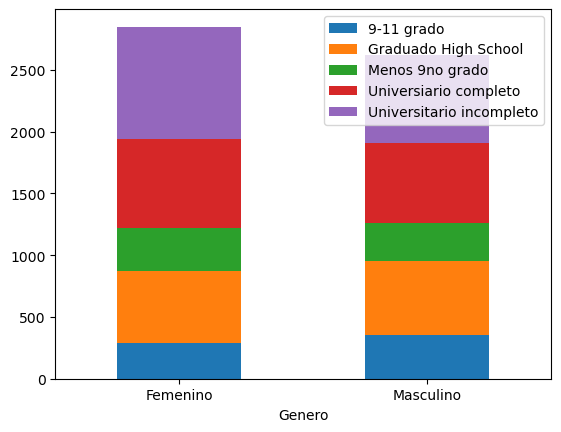

In [103]:
# Grafica de barra
observados.iloc[0:2,0:5].plot(kind='bar', stacked=True, rot=0)
plt.legend(loc='best')
plt.show()

*Conclusión:* Se observa las mismas proporciones en ambos generos para niveles de educación High School, Universitario Completo y Menos de 9no grado. Hay mayor cantidad de 9-11 grados para los hombres y Universitario incompleto es mayor para mujeres.

Variable `Estado` vs`Educacion`

In [104]:
# Tabla cruzada
db = data.loc[(data.Estado != "No sabe") & (data.Estado != "Niega") & (data.Educacion != "No sabe"), :]
observados = pd.crosstab(index=db['Estado'], columns=db['Educacion'], margins=True)
observados

Educacion    9-11 grado  Graduado High School  Menos 9no grado  \
Estado                                                           
Casado              305                   550              341   
Conviviente          80                   133               66   
Divorciado           62                   127               52   
Separado             39                    40               43   
Soltero             117                   237               65   
Viudo                40                    99               88   
All                 643                  1186              655   

Educacion    Universiario completo  Universitario incompleto   All  
Estado                                                              
Casado                         827                       757  2780  
Conviviente                     85                       163   527  
Divorciado                     120                       217   578  
Separado                        22                        42   186  
Soltero                        253                       332  1004  
Viudo                           59                       108   394  
All                           1366                      1619  5469

In [105]:
# Aplicando Chi cuadrado
test=chi2_contingency(observados)

In [106]:
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%test)

chisq-statistic=218.0467, p-value=0.0000, df=30 expected_frep=[[ 326.84951545  602.86706893  332.94935089  694.36460048  822.96946425
  2780.        ]
 [  61.96032181  114.28451271   63.11665752  131.62954836  156.00895959
   527.        ]
 [  67.95648199  125.34430426   69.22472116  144.36789175  171.10660084
   578.        ]
 [  21.86834888   40.33571037   22.27646736   46.45748766   55.06198574
   186.        ]
 [ 118.04205522  217.72609252  120.24501737  250.77052478  297.21631011
  1004.        ]
 [  46.32327665   85.44231121   47.1877857    98.40994697  116.63667947
   394.        ]
 [ 643.         1186.          655.         1366.         1619.
  5469.        ]]


Como el p-value < 0.05, hay diferencias significativas: Hay relación entre variables.

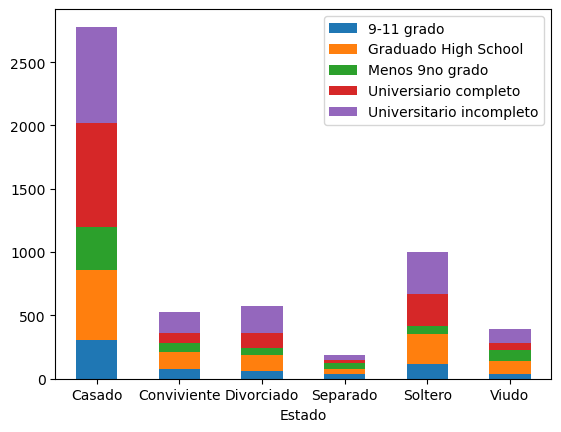

In [107]:
# Grafica de barra
observados.iloc[0:6,0:5].plot(kind='bar', stacked=True, rot=0)
plt.legend(loc='best')
plt.show()

*Conclusión:* Se observa mayor cantidad de casados con Universitario completo y con menor cantidad para los de menos de 9no grado. Entonces se puede decir que a mayor nivel de educación hay más casados. Sin embargo, dentro del grupo de divorciados, el mayor porcentaje son los Universatio Completo.

### Asociación entre variables cualitativas y cuantitativas

Variable `Edad` vs`Estado`

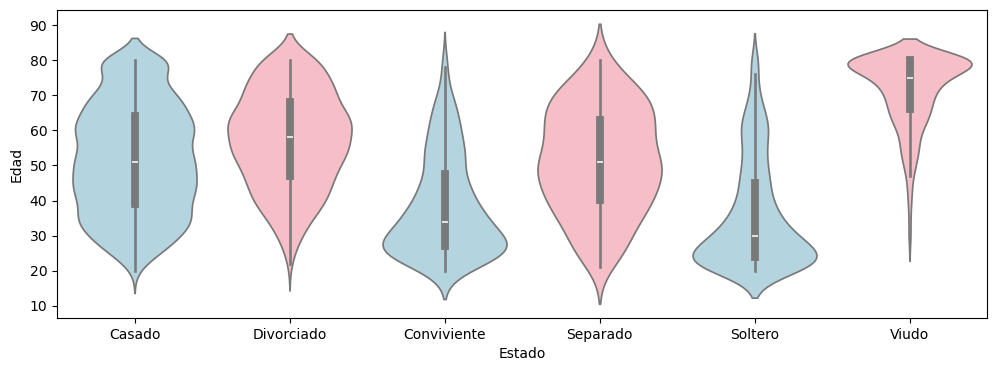

In [108]:
# Gráfica de la Edad vs Estado
plt.figure(figsize=(12, 4))
db = data.loc[(data.Estado != "No sabe") & (data.Estado != "Niega"), :]
sns.violinplot(db, x='Estado', y='Edad', palette=["lightblue", "lightpink"])
plt.show()

*Conclusión:* Se observa una mayor concentración de Conviviente y Soltero a menores edades (20-30 años). Para Viudo se muestra una mayor distribución a mayores edades (70-80 años). Casado, Divorciado y Separado se observan más distribuidos simétricamente a comparación de las otras.

Variable presión `Sistolica` vs`Edad`

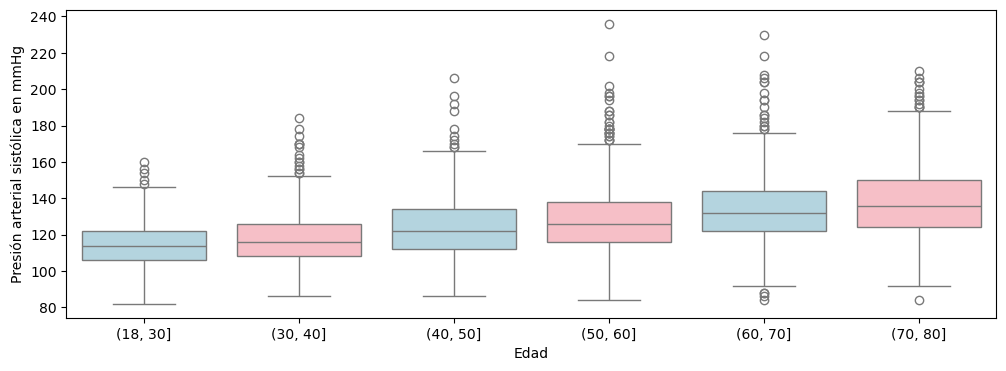

In [109]:
# Gráfica de la presión arterial sistólica vs edad
data['Edadc'] = pd.cut(data['Edad'], [18, 30, 40, 50, 60, 70, 80]) # estratificamos la variable edad
plt.figure(figsize=(12, 4))
sns.boxplot(data, x='Edadc', y='Sistolica', palette=["lightblue", "lightpink"])
plt.ylabel('Presión arterial sistólica en mmHg')
plt.xlabel('Edad')
plt.show()

*Conclusión:* Se observa claramente que hay una tendencia creciente de la presión arterial sistólica conforme las personas tienen más edad.

Ahora incluimos el genero en el análisis.

Variable Presión `Sistolica` vs`Edad`

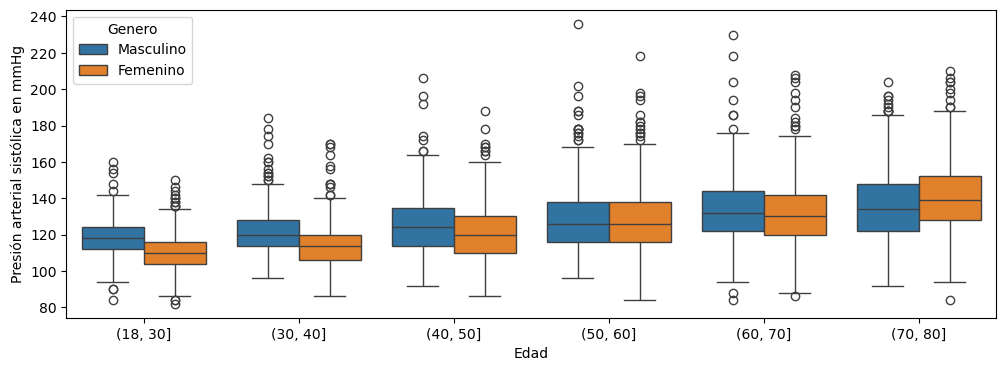

In [110]:
# Gráfica de la presión arterial sistólica vs edad vs genero
plt.figure(figsize=(12, 4))
sns.boxplot(data, x='Edadc', y='Sistolica', hue='Genero')
plt.ylabel('Presión arterial sistólica en mmHg')
plt.xlabel('Edad')
plt.show()

*Conclusión:* Se observa que para edades menores a 50 años, la presión arterial sistólica del genero masculino es mayor al femenino. Mientras para edades superiores a los 70 años se muestra que la presión es mayor en el genero femenino.

# 2. Modelos Probabilísticos: Uso de distribuciones conocidas

* **(5 puntos)** Identificar qué variables dentro de su conjunto de datos podrían tener
distribución normal. Elegir dos variables, la más aproximada y la más diferente a tener
esta distribución. Para cada una de ellas mostrar lo siguiente:
  * i. Elegir un gráfico apropiado para mostrar la distribución de la variable.
  * ii. Analizar gráfica o cuantitativamente la asimetría de la distribución.
  * iii. Concluir, y justificar según lo observado, si ¿es posible asumir una distribución
normal para la variable?.
  * iv. Estimar los parámetros de la distribución normal a partir de los datos: media y
desviación estándar.

In [111]:
print("Las variables numéricas disponibles que se tienen son: {}".format(data.select_dtypes(include="number").columns.tolist()))

Las variables numéricas disponibles que se tienen son: ['Edad', 'Personas Hogar', 'Ingresos', 'Sistolica', 'Diastolica', 'Altura', 'Pierna', 'Brazo Longitud', 'Muñeca']


De las variables restantes de la sección 1, se elige:

- Altura: Variable con mayor tendencia a una normal
- Muñeca: Variable con tendencia a ser más diferente a una normal

**Gráfico para mostrar la distribución de ambas variables:**

Text(0, 0.5, 'Frecuencia')

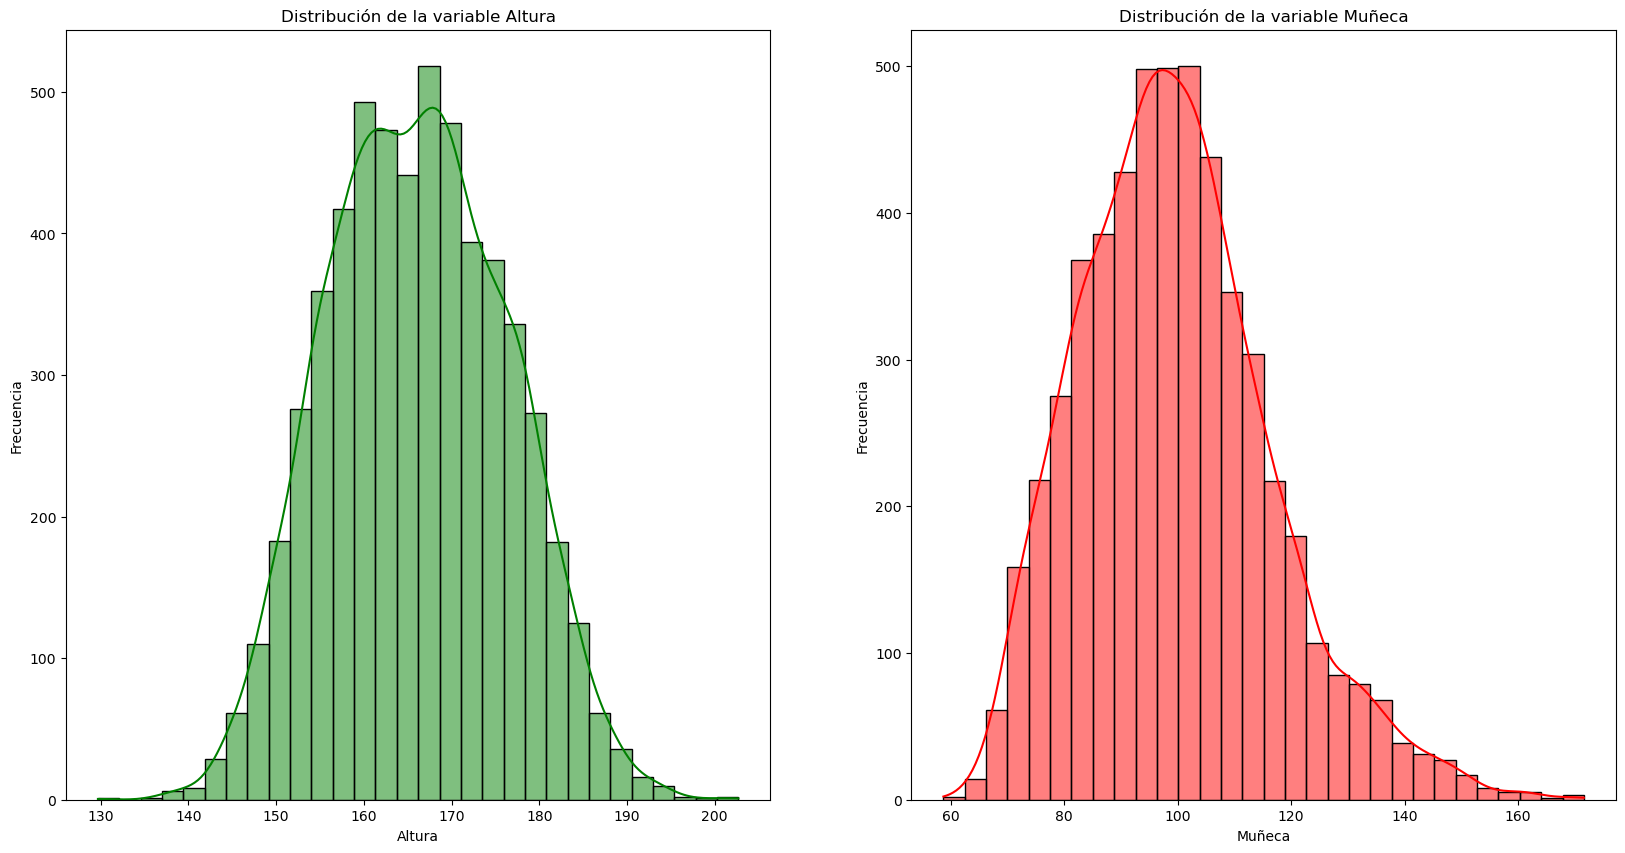

In [112]:
# Tamaño de la figura
plt.figure(figsize=(20,10))

# Distribución de la Altura
plt.subplot(1,2,1)
sns.histplot(data["Altura"], kde = True, bins = 30, color = 'green')
plt.title("Distribución de la variable Altura")
plt.xlabel("Altura")
plt.ylabel("Frecuencia")

# Distribución de Muñeca
plt.subplot(1,2,2)
sns.histplot(data["Muñeca"], kde = True, bins = 30, color = 'red')
plt.title("Distribución de la variable Muñeca")
plt.xlabel("Muñeca")
plt.ylabel("Frecuencia")

Análisis gráfico:

**Altura**: Se observa que la gráfica presenta bastante simetría, por lo cual a primera vista podría considerarse que la variable 'altura' posee una distribución normal. La media/moda/mediana están alrededor de 165. La distribución presenta valores aproximadamente desde 130 hasta 200. El gráfico no cuenta con cola, por lo que la mayoría de valores están distribuidos alrededor de la media.

**Muñeca**: Se observa que la gráfica presenta una cola larga hacia la derecha, indicando asimetría positiva. La media se encuentra aproximadamente alrededor de 110; sin embargo, la mediana y moda se encuentran aproximadamente alrededor de 100 y 90, respectivamente. La distribución presenta valores desde 60, hasta alrededor de 160-170.

**Análisis cuantitativo para verificar normalidad de ambas variables:**

In [113]:
print("La variable 'Altura' tiene {} muestras, mientras que la variable 'Muñeca' presenta {} muestras".format(data["Altura"].dropna().shape[0], data["Muñeca"].dropna().shape[0]))

La variable 'Altura' tiene 5673 muestras, mientras que la variable 'Muñeca' presenta 5368 muestras


Debido a que el número de muestras para ambas variables es grande (n > 50), se utilizará el test de normalidad de Kolmogórov-Smirnov, el cual es más adecuado para muestras grandes.

In [114]:
from scipy.stats import kstest, norm

resultados = {}

for var in ["Altura", "Muñeca"]:
    data_stats = data[var].dropna()
    mean = data_stats.mean()
    std = data_stats.std()
    stat, p_value = kstest(data_stats, 'norm', args = (mean, std))
    resultados[var] = {'Statistic': stat, 'p-value': p_value, 'mean': mean, 'std': std}


# Resultados convertidos en un DataFrame para mejor visualización
results_stat_df = pd.DataFrame(resultados).T
print(results_stat_df)

        Statistic       p-value        mean        std
Altura   0.027550  3.569446e-04  166.142834  10.079264
Muñeca   0.038018  3.540862e-07   99.567213  16.844109


La hipótesis nula y alternativa para ambas variables es la siguiente:

-H0 (Hipótesis nula): La distribución es normal

-H1 (Hipótesis alternativa): La distribución no es normal

Además, se considera un nivel de significancia del 5%; es decir, si el p-value es menor a 0.05, se rechaza la hipótesis nula, entonces, se puede concluir que la variable no sigue una distribución normal.

Evaluando los p-value obtenidos, 3.56e-4 para Altura y 3.54e-7 para Muñeca, se llega a la conclusión de que, para grandes muestras, ambas variables no poseen una distribución normal.

Del análisis gráfico inicialmente se creía que la variable "Altura" poseía una distribución normal; sin embargo, con la prueba estadística se llega a la conclusión de que, para muestras grandes, la variable "Altura" y "Muñeca" no presentan una distribución normal.

Por un lado, de la gráfica de distribución de la variable "Altura" se había observado de que la media se encontraba alrededor de 165, y se puede asumir una desviación estandar de aproximadamente 15, ya que la mayoría de valores se encuentran alrededor de la media; estos valores están muy cerca a los de la realidad, debido a que la verdadera media es de 166, mientras que la desviación estandar es de 10.

Por otro lado, de la gráfica de distribución de la variable "Muñeca", se mencionó que en la gráfica se podía asumir una media de alrededor de 110, y una desviación estandar de aproximadamente 20, debido a que los datos también se encuentran alrededor de la media, pero ya que esta gráfica presenta una cola, estos se encuentran un poco más esparcidos y no tan centralizados. Al final los valores reales de la media son 99.5, mientras que la desviación estandar es de 16.84.

# 3. Uso de arboles de decisión

* **(4 puntos)** Construir un modelo basado en arboles de decisiones con algunas variables
de su elección en el conjunto de datos. Realizar lo siguiente:
  * i. Definir una variable target y un problema a resolver basado en la predicción de
este target.
  * ii. Elegir un método para la selección de variables y entrenar el modelo.
  * iii. Generar la representación gráfica del árbol de decisiones.
  * iv. Plantear una estrategia que permita resolver el problema planteado en “i”
basado en la predicción del target elegido.

El problema a resolver será el enunciado en la pregunta 1, predecir si una persona sufre de hipertensión en base a sus características, además de analizar cual es la característica que más influye al momento de clasificar positivamente a una persona con hipertensión. La variable target será ***"Hipertensión"***.
Para realizar la predicción del modelo se necesita que todas las variables sean numéricas, por lo tanto, se trabajará con las variables originales de la base de datos.

In [115]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ALQ101        5208 non-null   float64
 1   SMQ020        5735 non-null   int64  
 2   RIAGENDR      5735 non-null   int64  
 3   RIDAGEYR      5735 non-null   int64  
 4   RIDRETH1      5735 non-null   int64  
 5   DMDCITZN      5734 non-null   float64
 6   DMDEDUC2      5474 non-null   float64
 7   DMDMARTL      5474 non-null   float64
 8   DMDHHSIZ      5735 non-null   int64  
 9   INDFMPIR      5134 non-null   float64
 10  BPXSY1        5401 non-null   float64
 11  BPXDI1        5401 non-null   float64
 12  BMXWT         5666 non-null   float64
 13  BMXHT         5673 non-null   float64
 14  BMXBMI        5662 non-null   float64
 15  BMXLEG        5345 non-null   float64
 16  BMXARML       5427 non-null   float64
 17  BMXARMC       5427 non-null   float64
 18  BMXWAIST      5368 non-null 

In [116]:
# Renombramos las variables
renombrar = {
             'ALQ101': 'Alcohol',
             'SMQ020': 'Fumador',
             'RIAGENDR': 'Genero',
             'RIDRETH1': 'Raza',
             'DMDCITZN': 'Ciudadania',
             'DMDEDUC2': 'Educacion',
             'DMDMARTL': 'Estado',
             'RIDAGEYR': 'Edad',
             'DMDHHSIZ': 'Personas Hogar',
             'INDFMPIR': 'Ingresos',
             'BMXWT': 'Peso',
             'BMXHT': 'Altura',
             'BMXBMI': 'IMC',
             'BMXLEG': 'Pierna',
             'BMXARML': 'Brazo Longitud',
             'BMXARMC': 'Brazo Circunferencia',
             'BMXWAIST': 'Muñeca'
}
data2.rename(columns=renombrar, inplace=True)

In [117]:
data2.drop(columns = ["BPXSY1", "BPXDI1"], inplace = True) # Se dropean estas 2 variables ya que fueron usadas para crear la variable objetivo

In [118]:
data2["Hipertension"] = np.where(data2["Hipertension"]=="Si",1,0)

In [119]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               5208 non-null   float64
 1   Fumador               5735 non-null   int64  
 2   Genero                5735 non-null   int64  
 3   Edad                  5735 non-null   int64  
 4   Raza                  5735 non-null   int64  
 5   Ciudadania            5734 non-null   float64
 6   Educacion             5474 non-null   float64
 7   Estado                5474 non-null   float64
 8   Personas Hogar        5735 non-null   int64  
 9   Ingresos              5134 non-null   float64
 10  Peso                  5666 non-null   float64
 11  Altura                5673 non-null   float64
 12  IMC                   5662 non-null   float64
 13  Pierna                5345 non-null   float64
 14  Brazo Longitud        5427 non-null   float64
 15  Brazo Circunferencia 

In [120]:
val_nulos = data2.isnull().sum() / data2.shape[0]

In [121]:
list_val_nul = []
for i in val_nulos.index:
    if val_nulos[i] > 0:
        print("La variable {} presenta un {:.2f}% de valores nulos".format(i, val_nulos[i]*100))
        list_val_nul.append(i)

La variable Alcohol presenta un 9.19% de valores nulos
La variable Ciudadania presenta un 0.02% de valores nulos
La variable Educacion presenta un 4.55% de valores nulos
La variable Estado presenta un 4.55% de valores nulos
La variable Ingresos presenta un 10.48% de valores nulos
La variable Peso presenta un 1.20% de valores nulos
La variable Altura presenta un 1.08% de valores nulos
La variable IMC presenta un 1.27% de valores nulos
La variable Pierna presenta un 6.80% de valores nulos
La variable Brazo Longitud presenta un 5.37% de valores nulos
La variable Brazo Circunferencia presenta un 5.37% de valores nulos
La variable Muñeca presenta un 6.40% de valores nulos


Ya que el % de valores nulos por variable es muy bajo (en su mayoría menores al 10%), se reemplazarán esos valores nulos por la media.

In [122]:
data2.describe().T

count        mean        std    min     25%     50%  \
Alcohol               5208.0    1.336406   0.505514    1.0    1.00    1.00   
Fumador               5735.0    1.607149   0.571975    1.0    1.00    2.00   
Genero                5735.0    1.518919   0.499686    1.0    1.00    2.00   
Edad                  5735.0   48.052310  18.431011   18.0   32.00   48.00   
Raza                  5735.0    3.042371   1.296793    1.0    2.00    3.00   
Ciudadania            5734.0    1.185385   0.491678    1.0    1.00    1.00   
Educacion             5474.0    3.441725   1.309700    1.0    3.00    4.00   
Estado                5474.0    2.628608   2.366786    1.0    1.00    1.00   
Personas Hogar        5735.0    3.323801   1.724670    1.0    2.00    3.00   
Ingresos              5134.0    2.403204   1.601995    0.0    1.06    1.98   
Peso                  5666.0   81.342676  21.764409   32.4   65.90   78.20   
Altura                5673.0  166.142834  10.079264  129.7  158.70  166.00   
IMC                   5662.0   29.382197   7.095921   14.5   24.30   28.30   
Pierna                5345.0   38.576782   3.873018   26.0   36.00   38.60   
Brazo Longitud        5427.0   37.146987   2.800784   28.2   35.20   37.10   
Brazo Circunferencia  5427.0   33.112235   5.268027   17.1   29.50   32.70   
Muñeca                5368.0   99.567213  16.844109   58.7   87.60   98.30   
Hipertension          5735.0    0.192328   0.394164    0.0    0.00    0.00   

                         75%    max  
Alcohol                 2.00    9.0  
Fumador                 2.00    9.0  
Genero                  2.00    2.0  
Edad                   63.00   80.0  
Raza                    4.00    5.0  
Ciudadania              1.00    9.0  
Educacion               4.75    9.0  
Estado                  5.00   77.0  
Personas Hogar          5.00    7.0  
Ingresos                3.74    5.0  
Peso                   92.70  198.9  
Altura                173.50  202.7  
IMC                    33.00   67.3  
Pierna                 41.20   51.5  
Brazo Longitud         39.00   47.4  
Brazo Circunferencia   36.20   58.4  
Muñeca                109.30  171.6  
Hipertension            0.00    1.0

In [123]:
for i in list_val_nul:
    data2[i].fillna(np.mean(data2[i]), inplace = True)

In [124]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               5735 non-null   float64
 1   Fumador               5735 non-null   int64  
 2   Genero                5735 non-null   int64  
 3   Edad                  5735 non-null   int64  
 4   Raza                  5735 non-null   int64  
 5   Ciudadania            5735 non-null   float64
 6   Educacion             5735 non-null   float64
 7   Estado                5735 non-null   float64
 8   Personas Hogar        5735 non-null   int64  
 9   Ingresos              5735 non-null   float64
 10  Peso                  5735 non-null   float64
 11  Altura                5735 non-null   float64
 12  IMC                   5735 non-null   float64
 13  Pierna                5735 non-null   float64
 14  Brazo Longitud        5735 non-null   float64
 15  Brazo Circunferencia 

Se trataron todas las variables: Ya no se tienen valores nulos y todas las variables son numéricas.

Para la selección de las mejores variables se utilizará la técnica **Backward**, debido a que la cantidad de variables no es muy grande, y este algoritmo tiene la ventaja de considerar los efectos de todas las variables simultáneamente, por lo cual verificará la correlación de estas.

Primero, se separan los datos en train - test

In [125]:
from sklearn.model_selection import train_test_split

X = data2.drop(columns = "Hipertension")
Y = data2["Hipertension"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 20, stratify = Y)

In [126]:
y_train.value_counts(normalize = True) * 100

Hipertension
0    80.775937
1    19.224063
Name: proportion, dtype: float64

In [127]:
y_test.value_counts(normalize = True) * 100

Hipertension
0    80.732345
1    19.267655
Name: proportion, dtype: float64

Ahora se procede a aplicar **Backward**. Se considera el modelo del tipo Árbol de decisión para la busqueda de las mejores variables, el *score* será del tipo roc_auc, puesto que este es más robusto al desbalance de las variables, ya que la variable objetivo está en una proporción de 80-20.

In [128]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

## Backward Elimination
clf = DecisionTreeClassifier(random_state = 50)

selector = SequentialFeatureSelector(clf,
          n_features_to_select= 5,
          direction='backward',
          scoring='roc_auc',
          cv=10)

selector.fit(X_train,y_train)

SequentialFeatureSelector(cv=10, direction='backward',
                          estimator=DecisionTreeClassifier(random_state=50),
                          n_features_to_select=5, scoring='roc_auc')

In [129]:
selected_backward = X_train.columns[selector.get_support()]
var_to_select = selected_backward.sort_values().tolist()

Las mejores 5 variables seleccionadas por el algoritmo **Backward** son: 'Altura', 'Muñeca', 'Edad', 'Ingresos', 'Pierna'

In [130]:
var_to_select = ["Altura", "Muñeca", "Edad", "Ingresos", "Pierna"]

In [131]:
X_train_2 = X_train[var_to_select]
X_test_2 = X_test[var_to_select]

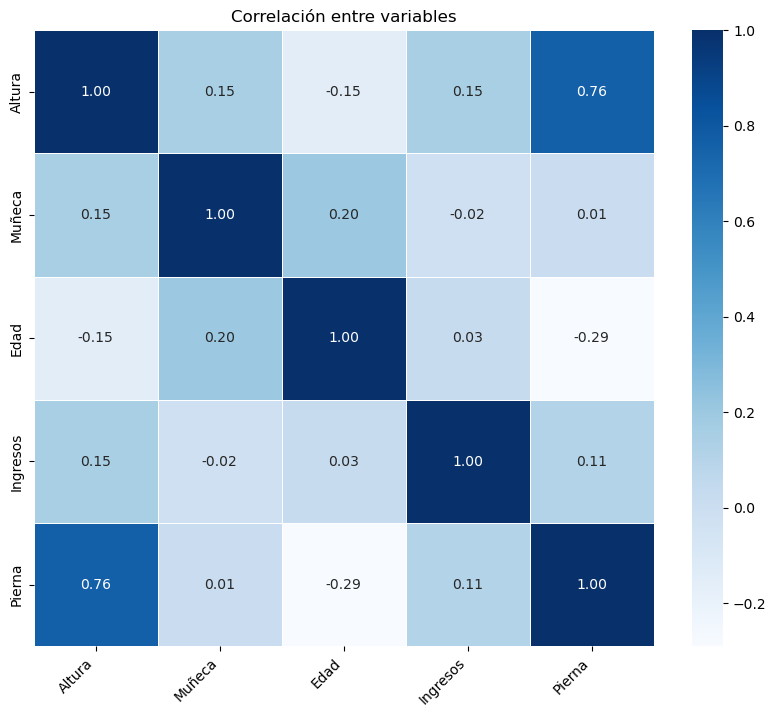

In [132]:
# De forma gráfica
plt.figure(figsize=(10, 8))
df_corr = X_train_2.corr().apply(lambda x: round(x, 2))
sns.heatmap(df_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre variables')
plt.xticks(rotation=45, ha='right')
plt.show()

Se observa en el mapa de correlación de las variables que todas presentan una correlación relativamente baja, a excepción de "Pierna" y "Altura". Se decide en mantener estas dos variables y entrenar al modelo de árbol de decisión.

Entrenamiento de árbol de decisión

In [133]:
#Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_2, y_train)

DecisionTreeClassifier()

In [134]:
# Evaluamos exactitud y score ROC AUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print(f'Exactitud - Decision Tree: {accuracy_score(y_test, dt.predict(X_test_2)):.4f}')
print(f'ROC-AUC para Arbol de decisión: {roc_auc_score(y_test, dt.predict_proba(X_test_2)[:,1])}')

Exactitud - Decision Tree: 0.7254
ROC-AUC para Arbol de decisión: 0.5715406115927015


In [ ]:
# Se realiza una búsqueda por grilla para optimizar el score del modelo árbol de decisión
from sklearn.model_selection import GridSearchCV

# Definir el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Definir los parámetros para la búsqueda por grilla
param_grid = {
    'criterion': ['gini', 'entropy'],       # Función de medida de la calidad de la división
    'splitter': ['best', 'random'],         # Estrategia usada para dividir en cada nodo
    'max_depth': [None, 10, 20, 30, 40, 50],# Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 15, 20],       # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 5, 10],         # Número mínimo de muestras necesarias en un nodo hoja
    'max_features': [None, 'sqrt', 'log2']  # Número de características a considerar para encontrar la mejor división
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1, verbose=2)

# Ejecutar la búsqueda por grilla
grid_search.fit(X_train_2, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

In [136]:
# Entrenamos un modelo optimizado con los mejores hiperparámetros selccionados por la búsqueda por grilla

dt_best = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=10, max_features=None, min_samples_leaf=10, min_samples_split=2, splitter = "random")
dt_best.fit(X_train_2, y_train)

print(f'Exactitud - Decision Tree modelo optimizado: {accuracy_score(y_test, dt_best.predict(X_test_2)):.4f}')
print(f'ROC-AUC para Arbol de decisión de modelo optimizado: {roc_auc_score(y_test, dt_best.predict_proba(X_test_2)[:,1])}')

Exactitud - Decision Tree modelo optimizado: 0.7995
ROC-AUC para Arbol de decisión de modelo optimizado: 0.7672077636504011


Se observa que el modelo mejora su exactitud de 73% a 80%, y su score ROC AUC de 57% a 77%.

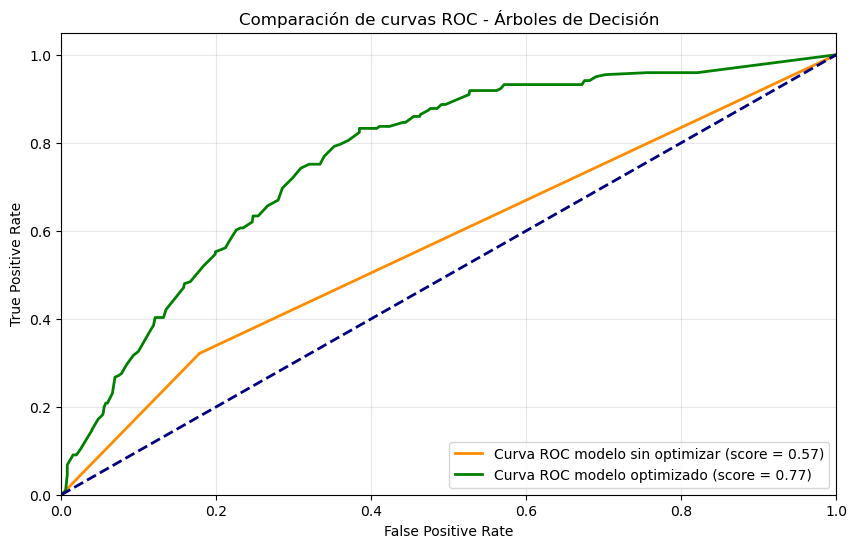

In [137]:
from sklearn.metrics import roc_curve, auc
# Curva ROC de modelo Decission Tree sin optimizar
fpr1, tpr1, thresholds = roc_curve(y_test, dt.predict_proba(X_test_2)[:,1])
roc_auc1 = auc(fpr1, tpr1)
# Curva ROC de modelo Decission Tree optimizado
fpr2, tpr2, thresholds = roc_curve(y_test, dt_best.predict_proba(X_test_2)[:,1])
roc_auc2 = auc(fpr2, tpr2)


# Generar la gráfica de las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Curva ROC modelo sin optimizar (score = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Curva ROC modelo optimizado (score = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparación de curvas ROC - Árboles de Decisión')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Se genera la **representación gráfica** del árbol de decisión

In [138]:
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus
from IPython.display import Image

# creando gráfico
dot_data = tree.export_graphviz(dt_best, out_file=None, feature_names=X_test_2.columns,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#graph.write_pdf("Arbol_Class.pdf")
graph.write_png("Arbol_Class.png")

True

La estrategia que permita resolver el problema planteado inicialmente se basará en la representación gráfica del árbol de decisiones, la cual incluye la estructura total que decide si una persona sufre de hipertensión o no.

La representación del árbol de decisión generado es muy grande, pues incluye una gran cantidad de nodos, ramas y hojas, por eso, el análisis se basará principalmente en los nodos más critícos, los de los primeros niveles.

El nodo raiz, primera división de valores, viene a ser la edad (gini = 0.314), con umbral de 63.1, esto indica que las personas menores a 63.1 se van hacia un nodo de segundo nivel, mientras que las mayores a 63.1 se van hacia otro nodo.

Por un lado, el primer nodo del segundo nivel (Edad < 32.065) presenta un gini de 0.241. Este nodo se divide en dos subnodos más: Muñeca < 119.572, con gini de 0.067 y Edad < 41.96 con gini de 0.313.
El nodo de la muñeca es muy puro, habiando 1134 samples sin hipertensión (0) y 41 samples con hipertensión (1), esto en resumen indica que si una persona es menor a 32 años y su muñeca mide menos de 1134, las probabilidades de que no sufra de hipertensión es grande. Después, este nodo puro de Muñeca se divide en dos nodos más:
Edad < 28.537 con gini de 0.061 y Altura < 167.941 con gini de 0.141. El nodo de Edad < 28.537 es más puro que el anterior, lo cual indica que si la persona es menor a 28 años, sus probabilidades de sufrir hipertensión son aún más bajas. Este nodo de Edad después se subdivide en 2 nodos donde se evalua el tamaño de la pierna. El nodo más resaltante de estos (menor gini), es: Pierna < 32.864, con gini de 0.037, el cual es aún menor al anterior, por lo que es un buen indicador de que si la persona cumple con las condiciones de edad, muñeca y pierna, sus probabilidades de sufrir hipertensión son bastante bajas.

Por otro lado, el segundo nodo del segundo nivel (Edad < 77.71) presenta un gini bastante alto de 0.466. Esto quiere decir que el nodo es bastante heterogéneo, ya que presenta una relación de 695 personas sin hipertensión (0) y 407 con hipertensión (1). Este nodo se subdivide en dos nodos más: Ingresos < 4.49 con gini de 0.44 y Altura < 171.722 con gini de 0.498. Estos dos nodos igualmente presentan un gini alto, se analizará el de menor gini.
El nodo Ingresos < 4.49 se subdivide en Altura < 173.55, con gini de 0.45, y Edad < 71.176 con gini de 0.377. El nuevo nodo de edad, el cual es el más puro, se sigue subdividiendo hasta llegar a una hoja con gini igual a 0; es decir, samples homogeneos. Esto en resumen indica que la edad es muy importante para predecir la hipertensión en las personas.

En resumen, se tiene que la variable más importante para predecir la hipertensión es la edad, la cual en varios nodos es muy usada para separar a las personas hipertensas. Otro factor que parece tener relevancia es el tamaño de las muñecas y las piernas, las cuales aparecen en los nodos más puros (menor gini), para segregar a las personas hipertensas.



Ahora se prueba con un modelo Random Forest a ver cuanto se puede mejorar el modelo:

In [139]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train_2, y_train)

print('Exactitud del modelo inicial en test:', rf.score(X_test_2, y_test))

y_pred_proba = rf.predict_proba(X_test_2)[:,1]
print("Score ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Exactitud del modelo inicial en test: 0.8029642545771578
Score ROC AUC: 0.7602225306138405


Se observa que el modelo Random Forest por defecto tiene un puntaje similar al modelo optimizado del árbol de decisión, ahora se optimizará mediante busqueda en grilla.

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir la grilla de parámetros
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar la búsqueda en grilla
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Ajustar el modelo con la búsqueda en grilla
grid_search.fit(X_train_2, y_train)

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
Mejores parámetros encontrados: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [169]:
# Modelo final RF
rf_best = RandomForestClassifier(bootstrap=True, max_depth = 10, max_features = "auto", min_samples_leaf = 2, min_samples_split = 10,
                                  n_estimators = 200, random_state=42)
rf_best.fit(X_train_2, y_train)

RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [170]:
# Se evalua el modelo con los mejores parámetros encontrados
y_proba = rf_best.predict_proba(X_test_2)[:,1]
roc_auc = roc_auc_score(y_test, y_proba)
print('Exactitud del mejor modelo en test:', rf_best.score(X_test_2, y_test))
print("ROC AUC del mejor modelo en el conjunto test:", roc_auc)

Exactitud del mejor modelo en test: 0.8099389712292938
ROC AUC del mejor modelo en el conjunto test: 0.7889526303959032


Se observa que el modelo Random Forest mejora, pasando de una exactitud de 80% a 81%, y de un score ROC AUC de 76% a 79%, en el conjunto test.

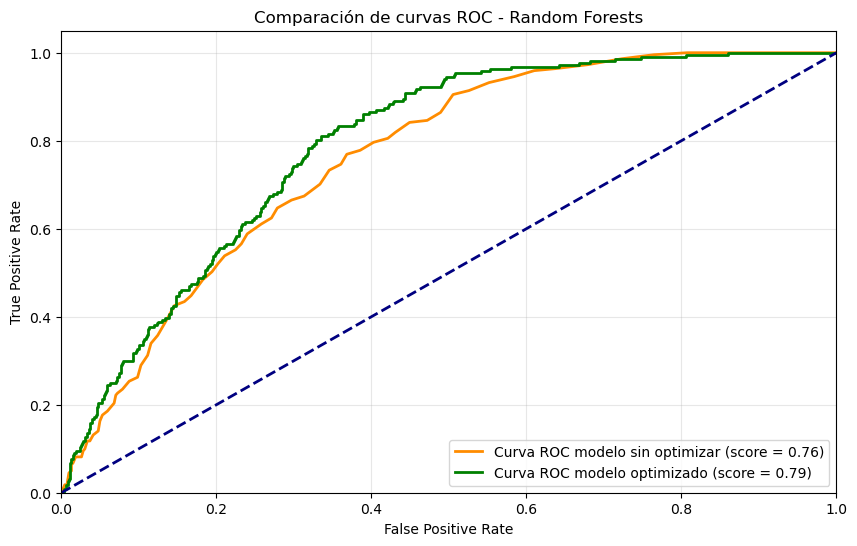

In [171]:
from sklearn.metrics import roc_curve, auc

rf = RandomForestClassifier()
rf.fit(X_train_2, y_train)

# Curva ROC de modelo Decission Tree sin optimizar
fpr1, tpr1, thresholds = roc_curve(y_test, rf.predict_proba(X_test_2)[:,1])
roc_auc1 = auc(fpr1, tpr1)
# Curva ROC de modelo Decission Tree optimizado
fpr2, tpr2, thresholds = roc_curve(y_test, rf_best.predict_proba(X_test_2)[:,1])
roc_auc2 = auc(fpr2, tpr2)

# Generar la gráfica de las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Curva ROC modelo sin optimizar (score = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Curva ROC modelo optimizado (score = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparación de curvas ROC - Random Forests')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Text(0.5, 1.0, 'Importancia de variables para el clasificador')

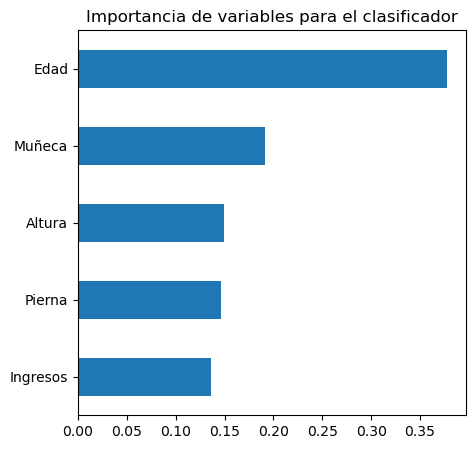

In [172]:
# Importancia de las variables

plt.figure(figsize=(5,5))
df_importancias = pd.DataFrame.from_dict({x:abs(y) for x,y in zip(X_train_2.columns,rf_best.feature_importances_)}, orient='index', columns=['Importancia'])
df_importancias = df_importancias.sort_values(by='Importancia', ascending=True)
df_importancias.Importancia.plot(kind='barh')
plt.title('Importancia de variables para el clasificador')

Con esta última gráfica de importancia de variables se confirma lo que se observó en el árbol de decisión, las variable Edad es la más importante al momento de clasificar a las personas con hipertensión, además, la variable muñeca también es muy importante, seguida de las variables Altura y Pierna.

# 4. Uso de regresión lineal

* **(6 puntos)** Ajustar un modelo de regresión lineal múltiple con algunas de las variables
de su elección en el conjunto de datos. Realizar lo siguiente:
  * i. Definir una variable target y un problema a resolver basado en la predicción de
este target.
  * ii. Elegir un método para la selección de variables y entrenar el modelo.
  * iii. Analizar la significancia de las variables en el modelo elegido.
  * iv. Interpretar coeficientes del modelo de regresión ajustado.
  * v. Analizar la multicolinealidad entre las variables. La respuesta debe ayudar a
responder lo siguiente: ¿Hay multicolinealidad entre las variables? Si existe,
¿Qué recomendaciones daría?
  * vi. Calcular e interpretar una métrica de bondad de ajuste para el modelo
  * vii. Verificar el cumplimiento de los supuestos del modelo

Para esta pregunta la variable target será la presión arterial sistólica. Como se mencionó en la primera parte, la hipertensión sucede cuando esta presión es mayor o igual a 140 mmHg, por lo tanto, al predecir el valor de la presión sistólica, se podría tener una idea inicial si una persona sufre o no hipertensión.

In [145]:
# Renombramos las variables
renombrar = {
             'ALQ101': 'Alcohol',
             'SMQ020': 'Fumador',
             'RIAGENDR': 'Genero',
             'RIDRETH1': 'Raza',
             'DMDCITZN': 'Ciudadania',
             'DMDEDUC2': 'Educacion',
             'DMDMARTL': 'Estado',
             'RIDAGEYR': 'Edad',
             'DMDHHSIZ': 'Personas Hogar',
             'INDFMPIR': 'Ingresos',
             'BMXWT': 'Peso',
             'BMXHT': 'Altura',
             'BMXBMI': 'IMC',
             'BMXLEG': 'Pierna',
             'BMXARML': 'Brazo Longitud',
             'BMXARMC': 'Brazo Circunferencia',
             'BMXWAIST': 'Muñeca',
             'BPXSY1': "Sistolica",
             'BPXDI1': 'Diastolica',
}
data3.rename(columns=renombrar, inplace=True)

In [146]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               5208 non-null   float64
 1   Fumador               5735 non-null   int64  
 2   Genero                5735 non-null   int64  
 3   Edad                  5735 non-null   int64  
 4   Raza                  5735 non-null   int64  
 5   Ciudadania            5734 non-null   float64
 6   Educacion             5474 non-null   float64
 7   Estado                5474 non-null   float64
 8   Personas Hogar        5735 non-null   int64  
 9   Ingresos              5134 non-null   float64
 10  Sistolica             5401 non-null   float64
 11  Diastolica            5401 non-null   float64
 12  Peso                  5666 non-null   float64
 13  Altura                5673 non-null   float64
 14  IMC                   5662 non-null   float64
 15  Pierna               

In [147]:
data3.drop(columns = ["Hipertension", "Diastolica"], inplace = True) # variables que no serán usadas en el modelo de regresión lineal

In [148]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               5208 non-null   float64
 1   Fumador               5735 non-null   int64  
 2   Genero                5735 non-null   int64  
 3   Edad                  5735 non-null   int64  
 4   Raza                  5735 non-null   int64  
 5   Ciudadania            5734 non-null   float64
 6   Educacion             5474 non-null   float64
 7   Estado                5474 non-null   float64
 8   Personas Hogar        5735 non-null   int64  
 9   Ingresos              5134 non-null   float64
 10  Sistolica             5401 non-null   float64
 11  Peso                  5666 non-null   float64
 12  Altura                5673 non-null   float64
 13  IMC                   5662 non-null   float64
 14  Pierna                5345 non-null   float64
 15  Brazo Longitud       

In [149]:
data3.isnull().sum() / data3.shape[0] * 100

Alcohol                  9.189189
Fumador                  0.000000
Genero                   0.000000
Edad                     0.000000
Raza                     0.000000
Ciudadania               0.017437
Educacion                4.551003
Estado                   4.551003
Personas Hogar           0.000000
Ingresos                10.479512
Sistolica                5.823888
Peso                     1.203139
Altura                   1.081081
IMC                      1.272886
Pierna                   6.800349
Brazo Longitud           5.370532
Brazo Circunferencia     5.370532
Muñeca                   6.399303
dtype: float64

Se observa que la variable objetivo "Sistolica" tiene valores nulos, se eliminarán las filas que contengan esos valores nulos.

In [150]:
data3.drop(index = data3[data3["Sistolica"].isna()].index, inplace = True)

In [151]:
data3.isnull().sum() / data3.shape[0] * 100

Alcohol                  7.980004
Fumador                  0.000000
Genero                   0.000000
Edad                     0.000000
Raza                     0.000000
Ciudadania               0.018515
Educacion                4.610257
Estado                   4.610257
Personas Hogar           0.000000
Ingresos                10.423996
Sistolica                0.000000
Peso                     0.925754
Altura                   0.814664
IMC                      0.999815
Pierna                   5.684133
Brazo Longitud           4.314016
Brazo Circunferencia     4.314016
Muñeca                   5.276801
dtype: float64

El resto de valores nulos se llenarán con la media respectiva

In [152]:
val_nulos = data3.isnull().sum() / data3.shape[0]

list_val_nul = []
for i in val_nulos.index:
    if val_nulos[i] > 0:
        print("La variable {} presenta un {:.2f}% de valores nulos".format(i, val_nulos[i]*100))
        list_val_nul.append(i)

La variable Alcohol presenta un 7.98% de valores nulos
La variable Ciudadania presenta un 0.02% de valores nulos
La variable Educacion presenta un 4.61% de valores nulos
La variable Estado presenta un 4.61% de valores nulos
La variable Ingresos presenta un 10.42% de valores nulos
La variable Peso presenta un 0.93% de valores nulos
La variable Altura presenta un 0.81% de valores nulos
La variable IMC presenta un 1.00% de valores nulos
La variable Pierna presenta un 5.68% de valores nulos
La variable Brazo Longitud presenta un 4.31% de valores nulos
La variable Brazo Circunferencia presenta un 4.31% de valores nulos
La variable Muñeca presenta un 5.28% de valores nulos


In [153]:
for i in list_val_nul:
    data3[i].fillna(np.mean(data3[i]), inplace = True)

In [154]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5401 entries, 0 to 5734
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               5401 non-null   float64
 1   Fumador               5401 non-null   int64  
 2   Genero                5401 non-null   int64  
 3   Edad                  5401 non-null   int64  
 4   Raza                  5401 non-null   int64  
 5   Ciudadania            5401 non-null   float64
 6   Educacion             5401 non-null   float64
 7   Estado                5401 non-null   float64
 8   Personas Hogar        5401 non-null   int64  
 9   Ingresos              5401 non-null   float64
 10  Sistolica             5401 non-null   float64
 11  Peso                  5401 non-null   float64
 12  Altura                5401 non-null   float64
 13  IMC                   5401 non-null   float64
 14  Pierna                5401 non-null   float64
 15  Brazo Longitud        5401

Ahora se procede a eliminar los outliers

In [155]:
# Separamos en X y Y
X = data3.drop(columns = "Sistolica")
Y = data3["Sistolica"]

In [156]:
def es_outlier(df, columna, umbral=1.5):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  return (df[columna]<q1-umbral*iqr)|(df[columna]>q3+umbral*iqr)

In [157]:
for i in X.columns.values:
  print("Cantidad de outliers para " + i + ":", X.loc[es_outlier(X, i)].shape[0])

Cantidad de outliers para Alcohol: 3
Cantidad de outliers para Fumador: 8
Cantidad de outliers para Genero: 0
Cantidad de outliers para Edad: 0
Cantidad de outliers para Raza: 0
Cantidad de outliers para Ciudadania: 925
Cantidad de outliers para Educacion: 618
Cantidad de outliers para Estado: 2
Cantidad de outliers para Personas Hogar: 0
Cantidad de outliers para Ingresos: 0
Cantidad de outliers para Peso: 150
Cantidad de outliers para Altura: 6
Cantidad de outliers para IMC: 144
Cantidad de outliers para Pierna: 45
Cantidad de outliers para Brazo Longitud: 29
Cantidad de outliers para Brazo Circunferencia: 102
Cantidad de outliers para Muñeca: 115


Text(0.5, 1.0, 'Muñeca')

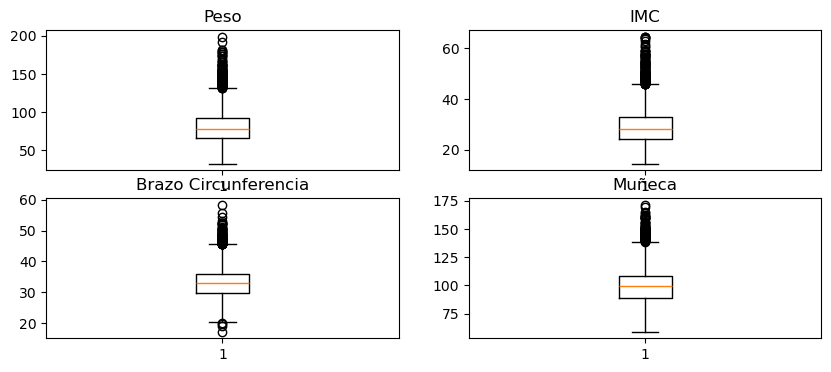

In [158]:
#Gráfica de outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(2,2, 1)
plt.boxplot(X["Peso"])
plt.title("Peso")

plt.subplot(2,2,2)
plt.boxplot(X["IMC"])
plt.title("IMC")

plt.subplot(2,2,3)
plt.boxplot(X["Brazo Circunferencia"])
plt.title("Brazo Circunferencia")

plt.subplot(2,2,4)
plt.boxplot(X["Muñeca"])
plt.title("Muñeca")

In [159]:
# Eliminamos Outliers de las 4 columnas seleccioandas:

for i in ["Peso","IMC", "Brazo Circunferencia", "Muñeca"]:
  indices_outliers = X.loc[es_outlier(X, i)].index
  X.drop(index=indices_outliers, inplace=True)
  Y.drop(index=indices_outliers, inplace=True)

In [160]:
X.shape

(5097, 17)

Text(0.5, 1.0, 'Muñeca')

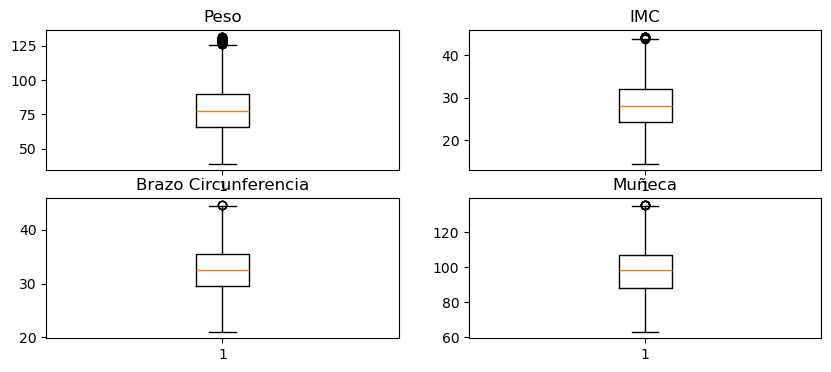

In [161]:
#Gráfica con reducción de outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(2,2, 1)
plt.boxplot(X["Peso"])
plt.title("Peso")

plt.subplot(2,2,2)
plt.boxplot(X["IMC"])
plt.title("IMC")

plt.subplot(2,2,3)
plt.boxplot(X["Brazo Circunferencia"])
plt.title("Brazo Circunferencia")

plt.subplot(2,2,4)
plt.boxplot(X["Muñeca"])
plt.title("Muñeca")

Se utilizará nuevamente el algoritmo **Backward** para la selección de variables, ya que este algoritmo evalua la colinealidad de las variables y, debido a que no se tienen muchas variables, el costo computacional es relativamente bajo.

In [162]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

## Backward Elimination
lr = LinearRegression()

selector = SequentialFeatureSelector(lr,
          n_features_to_select= 10,
          direction='backward',
          scoring='r2',
          cv=10)

selector.fit(X,Y)

SequentialFeatureSelector(cv=10, direction='backward',
                          estimator=LinearRegression(), n_features_to_select=10,
                          scoring='r2')

In [163]:
selected_backward = X.columns[selector.get_support()]
selected_backward.sort_values().tolist()

['Altura',
 'Brazo Longitud',
 'Edad',
 'Educacion',
 'Estado',
 'Genero',
 'Ingresos',
 'Peso',
 'Pierna',
 'Raza']

Las variables seleccionadas por el algoritmo son:

{'Altura',
 'Brazo Longitud',
 'Edad',
 'Educacion',
 'Estado',
 'Genero',
 'Ingresos',
 'Peso',
 'Pierna''
 'Raza'}

In [164]:
X_2 = X[selected_backward.sort_values().tolist()] # nuevo data frame con los features más importantes

Se analiza la significancia de las variables y los coeficientes del modelo de regresión lineal múltiple:

In [165]:
import statsmodels.api as sm
X_constant=sm.add_constant(X_2)
lin_reg=sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sistolica   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     182.3
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:06:56   Log-Likelihood:                -21339.
No. Observations:                5097   AIC:                         4.270e+04
Df Residuals:                    5086   BIC:                         4.277e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            117.3318      6.182     18.980      0.000     105.213     129.451
Altura            -0.1927      0.049     -3.954      0.000      -0.288      -0.097
Brazo Longitud     0.2201      0.147      1.499      0.134      -0.068       0.508
Edad               0.4821      0.014     35.014      0.000       0.455       0.509
Educacion         -1.0560      0.205     -5.158      0.000      -1.457      -0.655
Estado             0.4377      0.099      4.416      0.000       0.243       0.632
Genero            -3.4912      0.622     -5.615      0.000      -4.710      -2.272
Ingresos          -0.5164      0.165     -3.139      0.002      -0.839      -0.194
Peso               0.1008      0.016      6.363      0.000       0.070       0.132
Pierna             0.1894      0.101      1.875      0.061      -0.009       0.387
Raza               0.6180      0.185      3.334      0.001       0.255       0.981
==============================================================================
Omnibus:                      766.033   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1919.731
Skew:                           0.842   Prob(JB):                         0.00
Kurtosis:                       5.491   Cond. No.                     5.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Se visualiza la correlación de las 10 variables seleccionadas con la variable objetivo:

In [210]:
k_10_features = selected_backward.sort_values().tolist()
k_10_features.append("Sistolica")
data3[k_10_features].corr(method = "pearson").Sistolica

Altura           -0.007844
Brazo Longitud    0.103081
Edad              0.469233
Educacion        -0.144845
Estado           -0.067278
Genero           -0.100583
Ingresos         -0.058570
Peso              0.121365
Pierna           -0.077879
Raza             -0.008399
Sistolica         1.000000
Name: Sistolica, dtype: float64

Un p-value menor a 0.05 indica que la variable es estadísticamente significativa para el modelo. En base a los resultados obtenidos, se puede concluir lo siguiente:

1. Altura

    Coeficiente: -0.1927

    P-valor: 0.000

    Interpretación: La altura es significativamente negativa en el modelo. A medida que la altura aumenta, la presión sistólica disminuye.

2. Brazo Longitud
   
    Coeficiente: 0.2201

    P-valor: 0.134

    Interpretación: No es significativa en el modelo, lo que sugiere que la longitud del brazo no tiene un efecto claro en la presión sistólica.

3. Edad
   
    Coeficiente: 0.4821
   
    P-valor: 0.000

    Interpretación: Es significativa y positiva. A medida que la edad aumenta, la presión sistólica también aumenta.

4. Educacion
   
    Coeficiente: -1.0560

    P-valor: 0.000

    Interpretación: Es significativa y negativa. Mayor educación está asociada con una disminución en la presión sistólica.

5. Estado
   
    Coeficiente: 0.4377

    P-valor: 0.000

    Interpretación: Es significativa y positiva. El estado tiene un impacto positivo en la presión sistólica.

6. Genero

   Coeficiente: -3.4912

   P-valor: 0.000

   Interpretación: Es significativa y negativa. El género tiene un impacto negativo en la presión sistólica.

7. Ingresos

   Coeficiente: -0.5164

   P-valor: 0.001

   Interpretación: Es significativa y negativa. A medida que los ingresos aumentan, la presión sistólica disminuye.

8. Peso

   Coeficiente: 0.1008

   P-valor: 0.000

   Interpretación: Es significativa y positiva. A medida que el peso aumenta, la presión sistólica también aumenta.

9. Pierna

   Coeficiente: 0.1894

   P-valor: 0.061

   Interpretación: No es significativa, aunque está cerca del umbral. La longitud de la pierna tiene un efecto positivo, pero no claro, en la presión
   sistólica.

10. Raza

    Coeficiente: 0.6180

    P-valor: 0.001

    Interpretación: Es significativa y positiva. La raza tiene un impacto positivo en la presión sistólica.

Además, en la correlación con la variable objetivo "Sistolica", se observa que las variables que presentan mayor correlación con esta son: Edad, Educacion y Peso. Las variables con el p-value superior a 0.05 (no significativas), no presentan una correlación considerable con la variable objetivo.

Se decide en eliminar estas 2 variables.

In [214]:
k_8_features = k_10_features.copy()
k_8_features.remove('Sistolica')
k_8_features.remove('Brazo Longitud')
k_8_features.remove('Pierna')
X_3 = X_2[k_8_features]

Ahora analizamos la multicolinealidad de las variables:

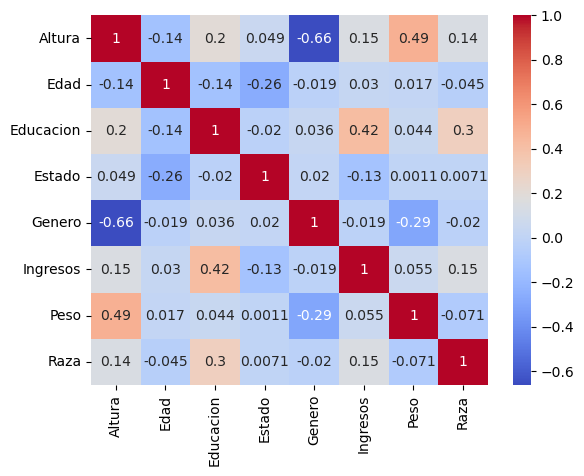

In [220]:
# Calcular la matriz de correlación
corr_matrix = X_3.corr(method = "pearson")

# Visualizar con un heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [221]:
# Se entrena un nuevo modelo para evaluar multicolinealidad
X_constant=sm.add_constant(X_3)
lin_reg=sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sistolica   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     226.8
Date:                Fri, 14 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:07:44   Log-Likelihood:                -21342.
No. Observations:                5097   AIC:                         4.270e+04
Df Residuals:                    5088   BIC:                         4.276e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.9128      6.147     19.183      0.000     105.862     129.963
Altura        -0.1055      0.036     -2.964      0.003      -0.175      -0.036
Edad           0.4786      0.013     37.295      0.000       0.453       0.504
Educacion     -1.0657      0.205     -5.206      0.000      -1.467      -0.664
Estado         0.4480      0.099      4.522      0.000       0.254       0.642
Genero        -3.6280      0.620     -5.853      0.000      -4.843      -2.413
Ingresos      -0.5205      0.165     -3.164      0.002      -0.843      -0.198
Peso           0.1090      0.015      7.254      0.000       0.080       0.138
Raza           0.6647      0.184      3.617      0.000       0.304       1.025
==============================================================================
Omnibus:                      769.571   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1932.983
Skew:                           0.844   Prob(JB):                         0.00
Kurtosis:                       5.500   Cond. No.                     5.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Todos los p-value son menores a 0.05 (significativos)

In [223]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X_3.columns).T #permitido <5

Altura      Edad  Educacion    Estado    Genero  Ingresos      Peso  \
vif  2.511308  1.142511   1.388351  1.094528  1.925185  1.249456  1.365583   

         Raza  
vif  1.137215

De la matriz de correlación se puede concluir que todas las variables presentan un correlación baja (<0.7), las variables que mayor correlación presentan son "Genero" y "Altura", con un puntaje de Pearson de 0.66.
Por otro lado, también se analizó el factor de inflación de la varianza (VIF), con las siguientes conclusiones:
- Altura (2.511308): Moderada colinealidad, pero aceptable.
- Edad (1.142511): Baja colinealidad.
- Educación (1.388351): Baja colinealidad.
- Estado (1.094528): Baja colinealidad.
- Género (1.925185): Moderada colinealidad, pero aceptable.
- Ingresos (1.249456): Baja colinealidad.
- Peso (1.365583): Baja colinealidad.
- Raza (1.137215): Baja colinealidad.

En resumen, no existen variables con alta correlación en los datos, por lo que se decide en mantener las 8 variables.

Ahora se procede en calcular la métrica de bondad de ajuste para el modelo.

In [225]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Modelo de regresión lineal múltiple
lm = LinearRegression()
lm.fit(X_3, Y)

LinearRegression()

In [226]:
y_pred = lm.predict(X_3) # Predicción del modelo

In [228]:
print("R2-Score:",r2_score(Y,y_pred))

R2-Score: 0.262862838738979


In [237]:
ys = pd.DataFrame({'y': Y, 'y_pred': y_pred, 'err': Y - y_pred, '|err|': np.abs(Y - y_pred)})
ys = ys[['y', 'y_pred', 'err', '|err|']]   # rearanging columns

Text(0, 0.5, 'y pred')

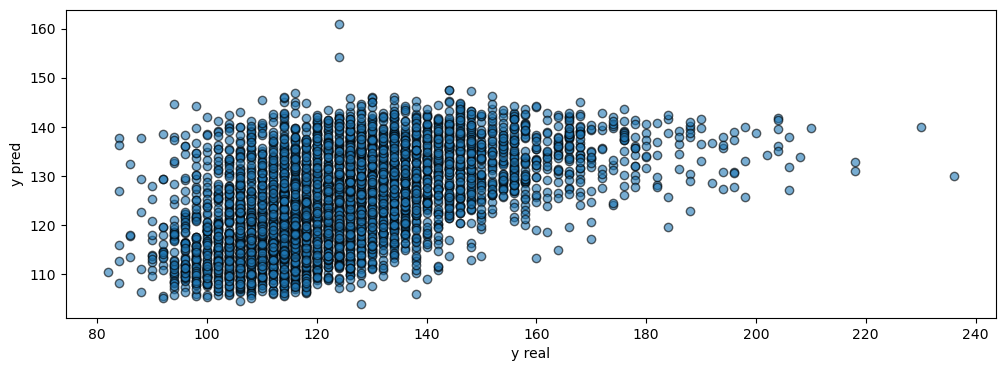

In [238]:
plt.figure(figsize=(12,4))
plt.scatter(ys['y'],ys['y_pred'],alpha =0.6,edgecolor = 'k')
plt.xlabel("y real")
plt.ylabel("y pred")

Se observa que la relación entre la variable real y predecida no es lineal, lo cual es indicador que el modelo no es muy bueno.

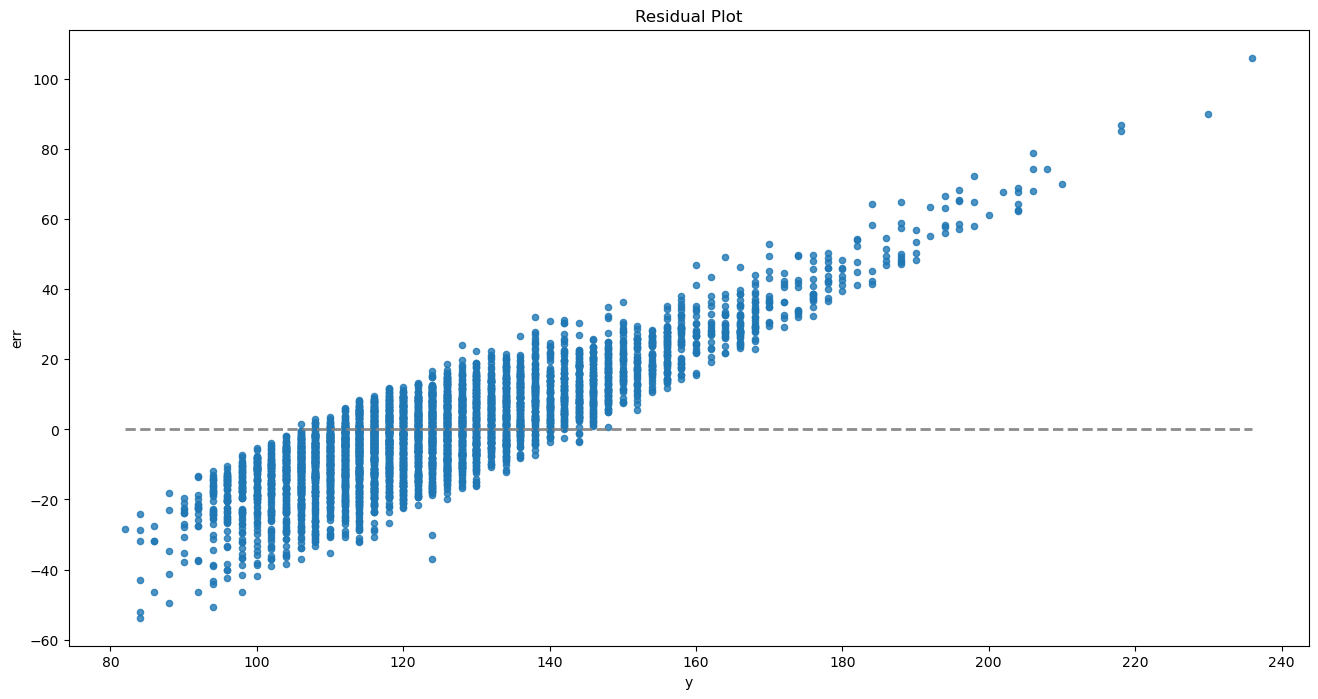

In [239]:
ys.plot(kind='scatter', x='y', y='err', figsize=(16,8), alpha=0.8, title='Residual Plot')
plt.plot([ys['y'].min(), ys['y'].max()], [0, 0], linewidth=2, alpha=0.9, ls='--', c='gray')

De la métrica de bondad de ajuste y los gráficos previos, se puede concluir que el modelo entrenado no tiene mucha capacidad para predecir correctamente la presión sistólica en base a las 8 variables seleccionadas. Esto se puede deber por 2 razones principalmente:
- Relación lineal entre predictores y la variable objetivo: En un análisis previo se vio que la mayoria de variables tenían una relación lineal muy baja con la variable objetivo (<10%), la única medianamente aceptable era la variable "Edad", la cual tenía casi un 50% de relación lineal. Para obtener un buen modelo es necesario que la relación lineal entre las variables predictores y la objetivo sea superior al 50-60%, y en este caso no se cumple.
- Distribución normal de la variable respuesta: En la sección 1 se graficó la presión sistólica, y se observó que la distribución no era muy normal, lo cual influye negativamente en la fase de entrenamiento del modelo. 

Ahora se verifica el cumplimiento de los supuestos del modelo, estos son:

- Valor esperado del error es cero

- La varianza del error es constante

- Los valores de error son independientes

- El error debe seguir una distribución normal

In [242]:
resid_val = lin_reg.resid
fitted_val=lin_reg.predict()
# Se debe cumplir que el promedio del residuo sea 0
lin_reg.resid.mean()

-3.4137277836557453e-14

Promedio muy cercano a 0

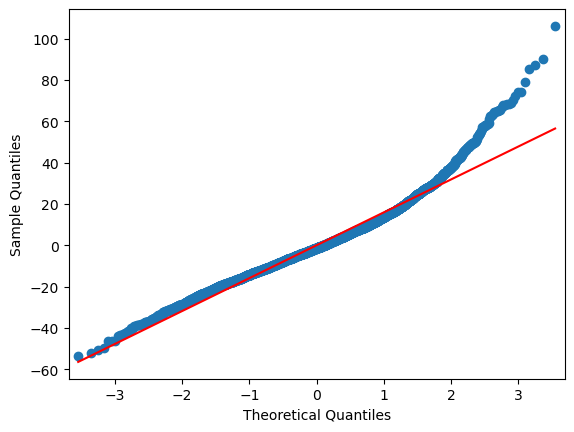

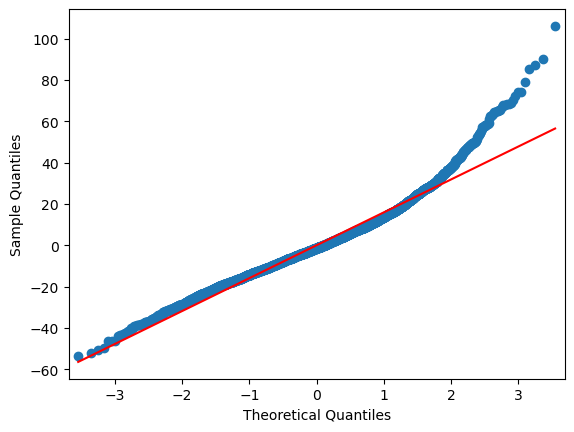

In [244]:
#Normality of residual with shapiro-wilk test - Verificamos distribución del error
from scipy import stats
sm.qqplot(resid_val,line='s')

Se observa que al inicio los datos del error siguen la curva de normalidad pero al final se desvian bastante, indicando que no cumplen con esa condición.

In [245]:
stats.shapiro(lin_reg.resid)
# H0:los datos siguen una distribucion normal

ShapiroResult(statistic=0.9632787704467773, pvalue=4.027129769901921e-34)

p-value menor a 0.05 -> Se rechaza la hipótesis nula, el error residual no sigue una distribución normal.

Text(0.5, 1.0, 'Fitted vs Observed')

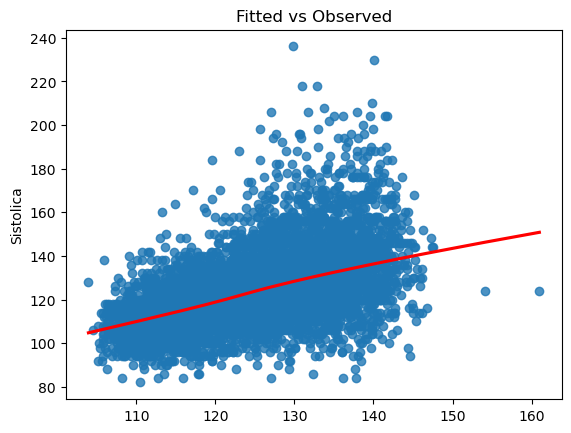

In [249]:
#linealidad del modelo
sns.regplot(x=fitted_val,y=Y, lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Observed') # Valor predecido vs real

La relación entre el valor real y predicho no presentan una relación lineal.

Text(0.5, 1.0, 'Fitted vs Residual')

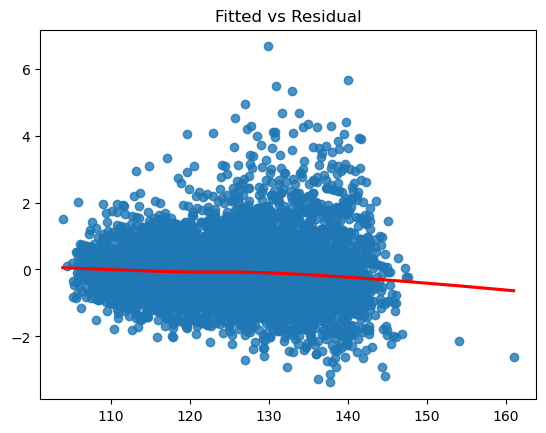

In [250]:
#homocedasticidad
resid_stand= lin_reg.get_influence().resid_studentized_internal
sns.regplot(x=fitted_val,y=resid_stand, lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Residual') # Valor predecido vs el error

No se observa una varianza homogenea, los valores del residual están muy dispersos.

In [253]:
import statsmodels.stats.api as sms
#breusch pagan test
#ho: sigue una distribucion con homocedasticidad, varianza igual en los residuales
bp_test=sms.het_breuschpagan(resid_val,lin_reg.model.exog)
print(bp_test)
print('breusch-pagan test: pvalue=',bp_test[1])

(303.73165476397855, 6.612187441246555e-61, 40.30096345886479, 7.794360980190854e-63)
breusch-pagan test: pvalue= 6.612187441246555e-61


Ya que el p-valor es practicamente 0, se rechaza la hipótesis nula; es decir, los valores residuales no presentan una varianza homogénea (homocedasticidad).

Después de verificar los supuestos del modelo, se concluye lo siguiente:

- Valor esperado del error: Muy cercano a 0, lo cual se aproxima a que el error es 0. **Sí se cumple el supuesto.**

- Distribución normal del error: El p-value es muy cercano a 0 y en la gráfica de shapiro-wilk se observa que error no sigue la recta de normalidad. **No se cumple el supuesto.**

- Varianza del error: Se observó en la gráfica de homocedasticidad que los gráficos están muy dispersos y no presentan una varianza constante. Además, en el test de breusch pagan el p-value obtenido es practicamente 0. **No se cumple el supuesto.**

- Independencia del error residual: En general se observa que los residuos no presentan una tendencia, por lo que se podría concluir que estos no están autorelacionados y son indenpendientes. **Sí se cumple el supuesto.**

# Uso de regresión logística (bonus)

* **(Bonus 2 puntos)** Ajustar un modelo de regresión logística múltiple con las variables
finales de la pregunta 4. Realizar lo siguiente:
  * i. Analizar la significancia de las variables en el modelo elegido.
  * ii. Interpretar coeficientes del modelo de regresión ajustado.
  * iii. Calcular e interpretar una métrica de bondad de ajuste para el modelo

Se clasificará si una persona sufre de hipertensión, para este caso solo se considerará la presión sistólica, si está es superior a 140, se considera que la persona sufre de hipertensión.

In [258]:
data4 = X_3.copy()

Se usan las 8 variables finales obtenidas en la anterior pregunta

In [259]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5097 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Altura     5097 non-null   float64
 1   Edad       5097 non-null   int64  
 2   Educacion  5097 non-null   float64
 3   Estado     5097 non-null   float64
 4   Genero     5097 non-null   int64  
 5   Ingresos   5097 non-null   float64
 6   Peso       5097 non-null   float64
 7   Raza       5097 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 358.4 KB


In [260]:
data4["Hipertension"] = np.where(Y >= 140, 1, 0)

In [261]:
data4.head()

Altura  Edad  Educacion  Estado  Genero  Ingresos   Peso  Raza  \
0   184.5    62        5.0     1.0       1      4.39   94.8     3   
1   171.4    53        3.0     3.0       1      1.32   90.4     3   
2   170.1    78        3.0     1.0       1      1.51   83.4     3   
3   160.9    56        5.0     6.0       2      5.00  109.8     3   
4   164.9    42        4.0     3.0       2      1.23   55.2     4   

   Hipertension  
0             0  
1             1  
2             0  
3             0  
4             0

In [264]:
data4["Hipertension"].value_counts(normalize = True) * 100

Hipertension
0    81.361585
1    18.638415
Name: proportion, dtype: float64

In [266]:
X_4 = data4.drop(columns = "Hipertension")
Y_4 = data4["Hipertension"]

Separamos la data en train y test (80% vs 20%)

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X_4, Y_4, test_size=0.2, random_state=42, stratify = Y_4)

In [303]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Escalado de datos

In [304]:
# Escalar datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [305]:
import statsmodels.api as sm
modelo=sm.Logit(y_train,X_train_sc)
result=modelo.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.411439
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Hipertension   No. Observations:                 4077
Model:                          Logit   Df Residuals:                     4069
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Jun 2024   Pseudo R-squ.:                  0.1446
Time:                        14:33:22   Log-Likelihood:                -1677.4
converged:                       True   LL-Null:                       -1960.9
Covariance Type:            nonrobust   LLR p-value:                3.068e-118
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Altura        -4.6314      0.381    -12.166      0.000      -5.377      -3.885
Edad           2.8694      0.

A continuación se analiza la significancia y el coeficiente de cada variable, considerando que si se obtiene un p-valor superior a 0.05, la variable no es significante para el modelo.

- Altura: p-value de 0, **sí es significante para el modelo**. Se observa un valor negativo alto de coeficiente, lo que indica que a mayor altura, las probabilidades de que una persona sufra de hipertensión se reducen.

- Edad: p-value de 0, **sí es significante para el modelo**. Se observa un valor positivo alto de coeficiente, lo que indica que a mayor edad, las probabilidades de que una persona sufra de hipertensión se reducen.

- Educacion: p-value de 0.034, **sí es significante para el modelo**. Se observa un valor negativo de coeficiente, entonces, a un valor más alto de educación (mejor educación), las probabilidades de que una persona sufra de hipertensión se reducen.

- Estado: p-value de 0.398, **no es significante para el modelo**. Se observa un valor negativo de coeficiente, entonces, a un mayor valor de estado, las probabilidades de que una persona sufra de hipertensión se reducen.

- Genero: p-value de 0, **sí es significante para el modelo**. Se observa un valor negativo de coeficiente, lo que indica que a un mayor valor de genero, las probabilidades de que una persona sufra de hipertensión se reducen.

- Ingresos: p-value de 0, **sí es significante para el modelo**. Se observa un valor negativo de coeficiente, lo que indica que si una persona presenta una mayor cantidad de ingresos, menos son las probabilidades de que sufra de hipertensión.

- Peso: p-value de 0.924, **no es significante para el modelo**. Se observa un valor positivo de coeficiente, lo que indica que las personas con más peso tienen más probabilidades de sufrir de hipertensión.

- Raza: p-value de 0.747, **no es significante para el modelo**. Se observa un valor positivo de coeficiente, lo que indica que a un mayor valor de raza, mayores son las probabilidades de que la persona sufra de hipertensión.

Ahora se valida el modelo en el data de test, debido al desbalance de datos, se utilizará la métrica ROC AUC para evaluar el modelo.

In [308]:
probabilidad_test=result.predict(X_test_sc)
X_test_f=X_test_sc.assign(prob=probabilidad_test)
X_test_f.head(3)

Altura     Edad  Educacion    Estado  Genero  Ingresos      Peso  Raza  \
0  0.188940  1.00000      0.500  0.013158     1.0  0.479411  0.328618  0.50   
1  0.471582  1.00000      0.375  0.000000     0.0  0.376000  0.618063  0.25   
2  0.218126  0.16129      0.375  0.065789     1.0  0.914000  0.392818  0.00   

       prob  
0  0.531688  
1  0.555142  
2  0.060444

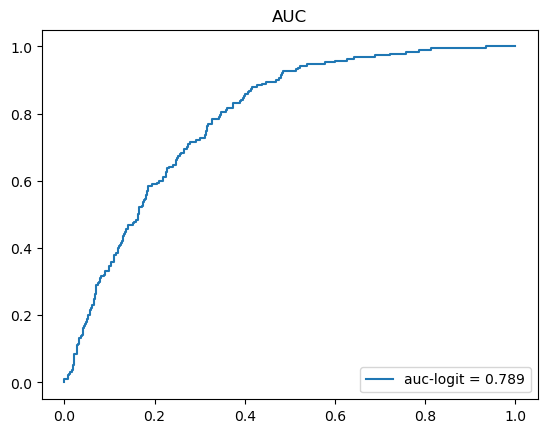

In [309]:
from sklearn.metrics import roc_auc_score, confusion_matrix,roc_curve

fpr, tpr, thresholds = roc_curve(y_test,X_test_f['prob'])
auc = np.round(roc_auc_score(y_true=y_test,
                             y_score=X_test_f['prob']),
               decimals=3)
plt.plot(fpr,tpr,label='auc-logit = '+str(auc))
plt.title('AUC')
plt.legend(loc=4)
plt.show()

La métrica ROC AUC presenta un score final de 79%, el cual es un puntaje aceptable, considerando que en la sección 3 el árbol de decisión brindo un score similar y este se encontraba optimizado.